<img src="Images/heading0.png" width="1500" height = "800">

<img src="Images/section1.png" width="1500" height = "200">

<h1><b>Examine the data

In [1]:
'''

------------------------------------------------------------------------------------------------------------------------

Data set source : https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

First we take a look at the data.
To do this we use the Pandas library which will allow use to process the CSV file we where given by the university.

We also import the numpy library so long, so that we can make use of numpy arrays and feautres from the start.

------------------------------------------------------------------------------------------------------------------------

'''
import pandas as pd
import numpy as np
'''

------------------------------------------------------------------------------------------------------------------------

Next we are going to import the data from the CSV file.

------------------------------------------------------------------------------------------------------------------------

'''
data = pd.read_csv('Csv Files/heart.csv')
pd.set_option('display.max_columns', None) #This will display all the columns in the dataframe

'''

------------------------------------------------------------------------------------------------------------------------

Then finally display the data

------------------------------------------------------------------------------------------------------------------------

'''
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


| Variable Name | Units or Categories | Description| Qaul / Quan | Type |
|:---------:|:---------:|:---------:|:---------:|:---------:|
|Age|Years|How many years the person has been alive| Quantitative | Discrete |
|Sex|Male (M); Female(F)|What gender the person is| Qaulitative | Nominal |
|ChestPainType| Typical Angina (TA);  Atypical Angina (ATA);  Non-Anginal Pain (NAP);  Asymptomatic (ASY)|What type of chest pain is the person experiencing| Qualitative | Nomial |
|RestingBP| mm Hg | The Patients resting Blood pressure| Quantitative | Discrete |
|Cholesterol| mm/dl| Patients Cholesterol levels | Quantitative | Discrete |
|FastingBS| 1: if FastingBS > 120 mg/dl, 0: otherwise | Fasting blood sugar| Qualitative | Nominal |
|RestingECG| Normal (Normal); Having ST-T wave abnormality (ST); Showing probable or definite left ventricular hypertrophy by Estes' criteria (LVH) | The patients Resting ECG | Qualitative | Nominal |
|MaxHR| Between 60 and 202 | The patients maximum heart rate achieved| Quantitative | Discrete |
|ExerciseAngina| Yes (Y); No (N)| If there was an exercise-induced angina | Qualitative | Nominal |
|Oldpeak| ST [Numeric value measured in depression] | ST depression induced by exercise relative to rest| Quantitative | Continuous |
|ST_Slope| Upsloping (Up); Flat (Flat); Downsloping (Down)|The slope of the peak exercise ST segment| Qualitative | Nominal |
|HeartDisease| Heart Disease (1); Normal (0)| Output class that describes if someone has heart disease or not| Qualitative | Nominal |




In [2]:
'''

------------------------------------------------------------------------------------------------------------------------

Let's count the data to get an idea of what we are working with.

------------------------------------------------------------------------------------------------------------------------

'''
data.count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

In [3]:
'''

------------------------------------------------------------------------------------------------------------------------

Each column has the same amount of records.
This likely means there are no missing values.
But there is still that tiny chance that there is an even number of missing values from each feature.
So we can run a quick check to see if there are any missing values.

------------------------------------------------------------------------------------------------------------------------

'''

print(data.isnull().values.any())
data.isnull().sum()

False


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
'''

------------------------------------------------------------------------------------------------------------------------

Like we assumed earlier, there are no missing values. 

------------------------------------------------------------------------------------------------------------------------

Now we can take a look into what type of data each record is.

------------------------------------------------------------------------------------------------------------------------

'''

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
'''

------------------------------------------------------------------------------------------------------------------------

From the information above we see that there are 7 numeric columns and 5 object columns.
But just because there columns are int64 or float64 does not mean that they have to be quantitative.
Let's check how many unique values the numerical columns have

------------------------------------------------------------------------------------------------------------------------

'''

for col in data.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {data[col].nunique()} unique value")


Age has 50 unique value
RestingBP has 67 unique value
Cholesterol has 222 unique value
FastingBS has 2 unique value
MaxHR has 119 unique value
Oldpeak has 53 unique value
HeartDisease has 2 unique value


In [6]:
'''

------------------------------------------------------------------------------------------------------------------------

Even though FastingBS is an int64, it is actually a one-hot encoded column.
So it counts as categorical.

------------------------------------------------------------------------------------------------------------------------

Another thing we notice is that we are using objects instead of strings. There isn't too many problems with this but
it could very easily cause problems down the line like when we input new data into the model. 
For now the biggest problem is clarity.
It can become confusing when working with objects as it isn't exactly clear what is in them.
So we can quickly convert the objects to strings.

------------------------------------------------------------------------------------------------------------------------

'''
string_col = data.select_dtypes(include="object").columns
data[string_col] = data[string_col].astype("string")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [7]:
'''

------------------------------------------------------------------------------------------------------------------------

Now we can split the features into a list of the categorical features and a list of the numerical features.

------------------------------------------------------------------------------------------------------------------------

'''

#We get the name of the columns for now and put them into a list
cat_cols = data.select_dtypes("string").columns.to_list()
cat_cols.append('FastingBS')
print(f'''The categorical columns are 
      {cat_cols}
      ''')


#Shortcut: Loops through a list of each column in data and adds it to the list as long as it is not in cat_cols and != HeartDisease
num_cols = [i for i in data.columns if i not in cat_cols and i != 'HeartDisease']
print(f'''The categorical columns are 
      {num_cols}
      ''')

The categorical columns are 
      ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']
      
The categorical columns are 
      ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
      


In [8]:
'''

------------------------------------------------------------------------------------------------------------------------

The next step should be to describe all the numerical features.
Keep in mind the describe() method automatically takes the numerical feautres so it isn't nessicary to split them here

------------------------------------------------------------------------------------------------------------------------

'''

data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:xlabel='Cholesterol', ylabel='RestingBP'>

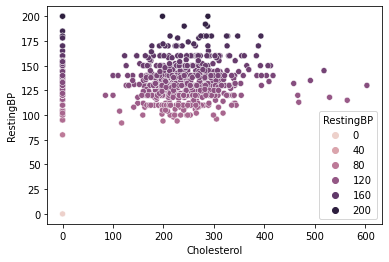

In [9]:
'''

------------------------------------------------------------------------------------------------------------------------

Oh no, we see the problem here, the Min for Cholestrol and RestingBP is 0
Let's take a better look at it by using scatterplots

------------------------------------------------------------------------------------------------------------------------

We will use seaborn for this.

------------------------------------------------------------------------------------------------------------------------

'''
import seaborn as sns
sns.scatterplot(data=data,x='Cholesterol',y='RestingBP',hue='RestingBP')



In [10]:
'''

------------------------------------------------------------------------------------------------------------------------

This could be a bit of a problem.
There seems to be a few records with Cholesterol = 0 and 1 record with RestingBP = 0.
The chances of a living person having a Cholesterol or BP = 0 is probably too low to consider.
So these are likely input errors.
So we need to fix them somehow.

------------------------------------------------------------------------------------------------------------------------

'''
import numpy as np #We use numpy to input a null value into the dataframe

data['Cholesterol'].replace(0,np.nan,inplace=True)
data['RestingBP'].replace(0,np.nan,inplace=True)


<AxesSubplot:>

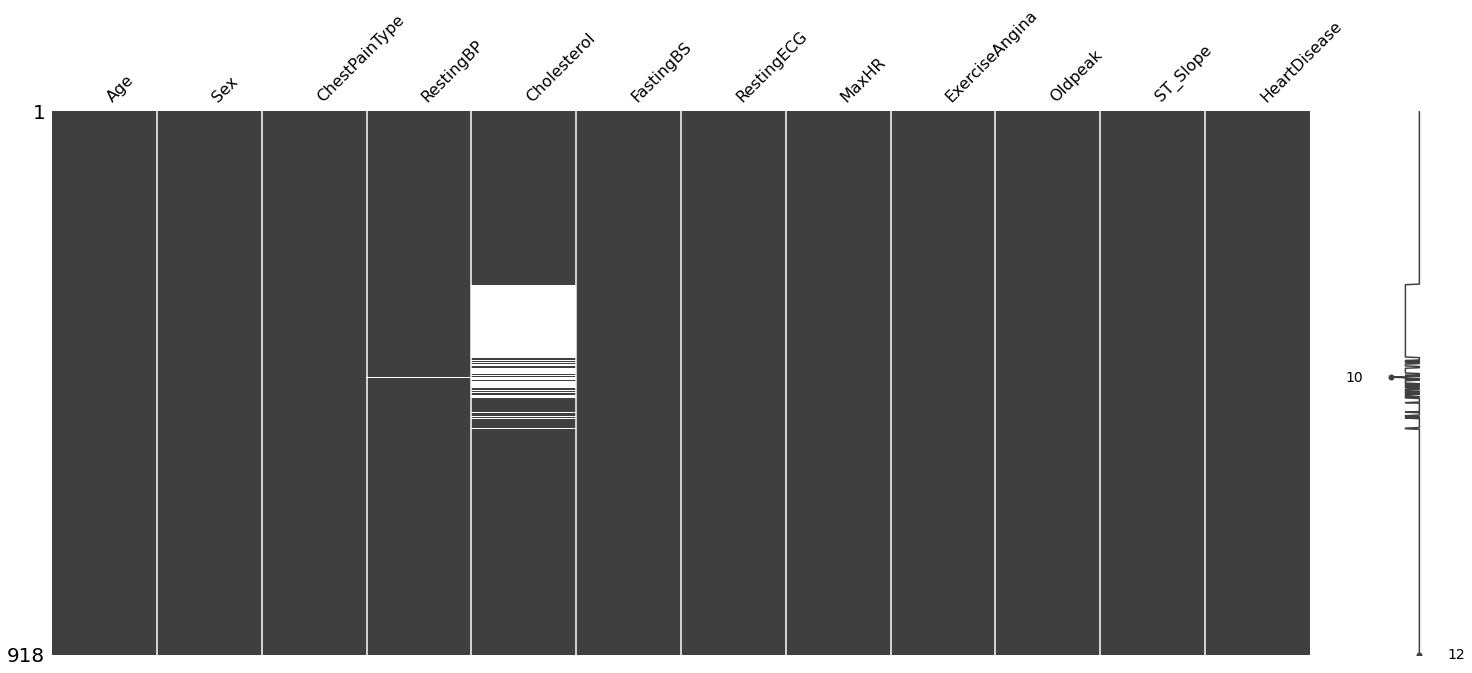

In [11]:
'''

------------------------------------------------------------------------------------------------------------------------

Let's visualise the null values

------------------------------------------------------------------------------------------------------------------------

'''
import missingno as msno

msno.matrix(data)

In [12]:
'''

------------------------------------------------------------------------------------------------------------------------

It looks like there are null values in the centre of the data.
Assuming these values where collected in chronological order, there was a time where someone was inputting values incorrectly.
Or one of the sources was unreliable.

------------------------------------------------------------------------------------------------------------------------

When we build the model we can experiment with different techniques to fill these gaps.
For now we will drop the values which are = 0. 
For the sake of analysing the data.

------------------------------------------------------------------------------------------------------------------------

'''
data = data.dropna()
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:xlabel='Cholesterol', ylabel='RestingBP'>

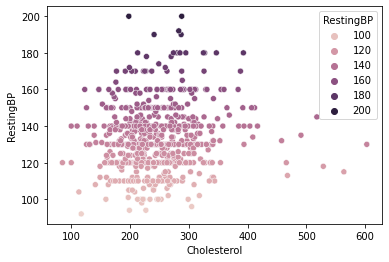

In [13]:
'''

------------------------------------------------------------------------------------------------------------------------

The dataset most certainly took a big hit here, by removing 172 records.
But let's see how it affected the integrity of the data.

------------------------------------------------------------------------------------------------------------------------

This describe may come into play later again, but for now we observe that there is a surprisingly high mean for the age.
This means that roughly 68% of the records are from people between the ages of 44 and 62 according to empirical law. ([mean-std] , [mean+std])
And 95% of the data will be between 35 and 71. ([mean-std*2] , [mean+std*2])

From this alone we conclude that this data seems to be from mostly middle aged people.

This may not be a coincidence as the data is from a heart failure study, so it's possible that age is a good indicator of the disease.

------------------------------------------------------------------------------------------------------------------------

'''
sns.scatterplot(data=data,x='Cholesterol',y='RestingBP',hue='RestingBP')

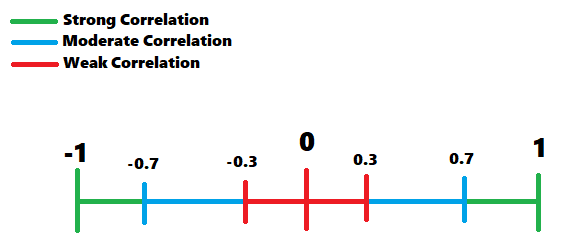

In [14]:
'''

------------------------------------------------------------------------------------------------------------------------

The data is already looking significantly better.
With much fewer outliers.

------------------------------------------------------------------------------------------------------------------------

The high and low of the correlation can either be -1 or +1 (Akoglu, 2018).
If the correlation coefficient is 0 then the relationship is weak, if the correlation coefficient is 1 then the relationship is perfect (Akoglu, 2018).
This means that if the correlation between the two variables is very close to 0, as you change the X value, the Y value may not change at all. 
If the number is very close to 1 then as the X variable goes up the Y variable will go up, and the closer the number is to 1 the more accurate the change becomes.
If the number is very close to -1 then as the X variable goes up, the Y variable will go down. The closer the number is to -1 the more accurate the change becomes.

------------------------------------------------------------------------------------------------------------------------

If the correlation is between -1 and -0.7 then it is a strong negative correlation, if it is between -0.69 and -0.3 it is a moderate negative correlation 
and if it is between -0.29 and 0 it is a weak negative correlation (Akoglu, 2018).
If the correlation is between 1 and 0.7 then it is a strong positive correlation, if it is between 0.69 and 0.3 it is a moderate positive correlation and if it is 
between 0.29 and 0 it is a weak positive correlation (Akoglu, 2018).

------------------------------------------------------------------------------------------------------------------------

'''
from IPython.display import Image
Image(filename='Images/Correlation.png') 

<AxesSubplot:>

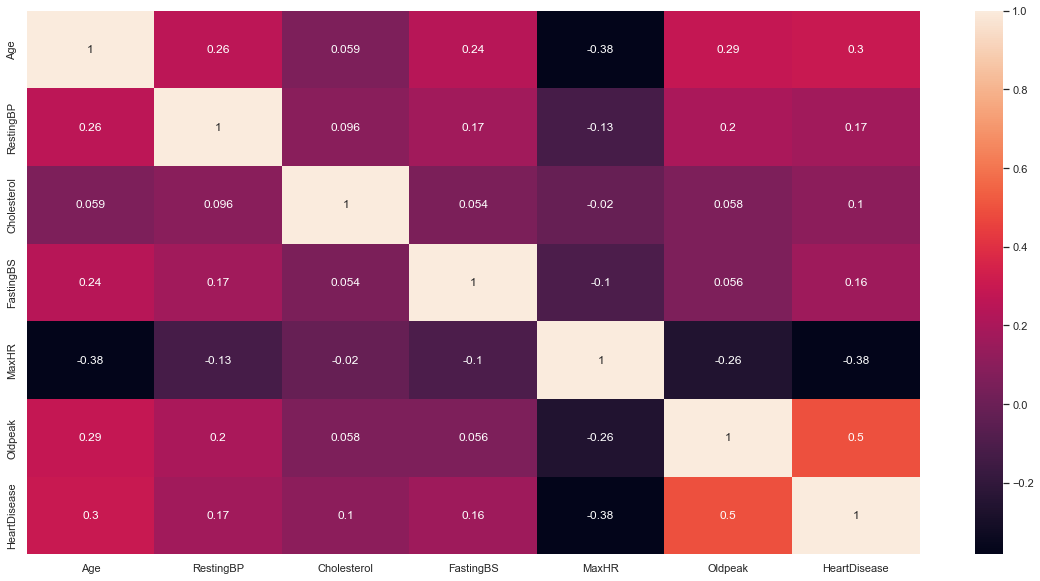

In [15]:
'''

------------------------------------------------------------------------------------------------------------------------

For now let's look at a correlation matrix to see if there are any notible relationships between the features.

------------------------------------------------------------------------------------------------------------------------

'''
import seaborn as sns
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(data.corr(), annot=True) #By saying annot=True it writes the correlation in each cell

In [16]:
'''

------------------------------------------------------------------------------------------------------------------------

We see that age and heart disease doesn't seem to have a strong relationship.
But there is a slightly notible negative correlation between MaxHeartRate and HeartDisease.
This means that as the MaxHeartRate increases the chance of heart disease decreases.
The exact opposite could also be noticed with the Oldpeak.

------------------------------------------------------------------------------------------------------------------------

A problem we have here is that every feature here is numeric, so we are completely disregarding the categorical features. (Apart from heart disease)
So to quickly fix that we will turn the categorical features into dummy variables.

------------------------------------------------------------------------------------------------------------------------

'''

dataFrameOne = pd.get_dummies(data, columns = cat_cols, drop_first = True) #We only want the categorical features to be dummy variables.
dataFrameOne


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,FastingBS_1
0,40,140.0,289.0,172,0.0,0,1,1,0,0,1,0,0,0,1,0
1,49,160.0,180.0,156,1.0,1,0,0,1,0,1,0,0,1,0,0
2,37,130.0,283.0,98,0.0,0,1,1,0,0,0,1,0,0,1,0
3,48,138.0,214.0,108,1.5,1,0,0,0,0,1,0,1,1,0,0
4,54,150.0,195.0,122,0.0,0,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,132,1.2,1,1,0,0,1,1,0,0,1,0,0
914,68,144.0,193.0,141,3.4,1,1,0,0,0,1,0,0,1,0,1
915,57,130.0,131.0,115,1.2,1,1,0,0,0,1,0,1,1,0,0
916,57,130.0,236.0,174,0.0,1,0,1,0,0,0,0,0,1,0,0


In [17]:
'''

------------------------------------------------------------------------------------------------------------------------

Here we run into a problem, It has created categories under the assumption that we can make assumptions.

To explain this we can look at the ChestPainType variables.
We notice that ChestPainType_ASY is not among the categories.
This is because if ATA,NAP and TA are all 0, then the ASY category must be 1.
So it's not nessicary to add the ASY column.

This is a repeating observation from all of the categorical variables.

But this will become a problem when we want to look at correlations as that category won't be 
part of the matrix.
The cause of those missing variables is the drop_first = True in the previous code block.

By setting drop_first = True we can remove the extra columns.
This would normally increase the efficiency of the model. 
But it heavily reduces our ability to analyse the data as those columns won't show up in graphs
or a matrix.

So we recreate the dummies with the value set to false.

------------------------------------------------------------------------------------------------------------------------

'''
dataFrameOne = pd.get_dummies(data, columns = cat_cols, drop_first = False)
dataFrameOne

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS_0,FastingBS_1
0,40,140.0,289.0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0
1,49,160.0,180.0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0
2,37,130.0,283.0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,1,0
3,48,138.0,214.0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0
4,54,150.0,195.0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,132,1.2,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0
914,68,144.0,193.0,141,3.4,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1
915,57,130.0,131.0,115,1.2,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0
916,57,130.0,236.0,174,0.0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0


In [18]:
'''

------------------------------------------------------------------------------------------------------------------------

This still isn't optimal.
Sex only has too options, so it would be better to have it as a binary variable instead of a dummy across two 
columns.

To do this we drop sex from the cat_cols for a bit, then create the dummies, then convert the sex into binary afterwards.

And since FastingBS is already a one-hot encoded variable, we can ingore it when creating the dummies.

------------------------------------------------------------------------------------------------------------------------

'''
cat_cols.remove('Sex')
cat_cols.remove('FastingBS')
dataFrameOne = pd.get_dummies(data, columns = cat_cols, drop_first = False)
dataFrameOne = pd.get_dummies(dataFrameOne, columns = ['Sex'], drop_first = True)
cat_cols.append('Sex')
cat_cols.append('FastingBS')
dataFrameOne



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_M
0,40,140.0,289.0,0,172,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1,1
1,49,160.0,180.0,0,156,1.0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
2,37,130.0,283.0,0,98,0.0,0,0,1,0,0,0,0,1,1,0,0,0,1,1
3,48,138.0,214.0,0,108,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0,0
4,54,150.0,195.0,0,122,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,0,0,0,1,0,1,0,1,0,0,1,0,1
914,68,144.0,193.0,1,141,3.4,1,1,0,0,0,0,1,0,1,0,0,1,0,1
915,57,130.0,131.0,0,115,1.2,1,1,0,0,0,0,1,0,0,1,0,1,0,1
916,57,130.0,236.0,0,174,0.0,1,0,1,0,0,1,0,0,1,0,0,1,0,0


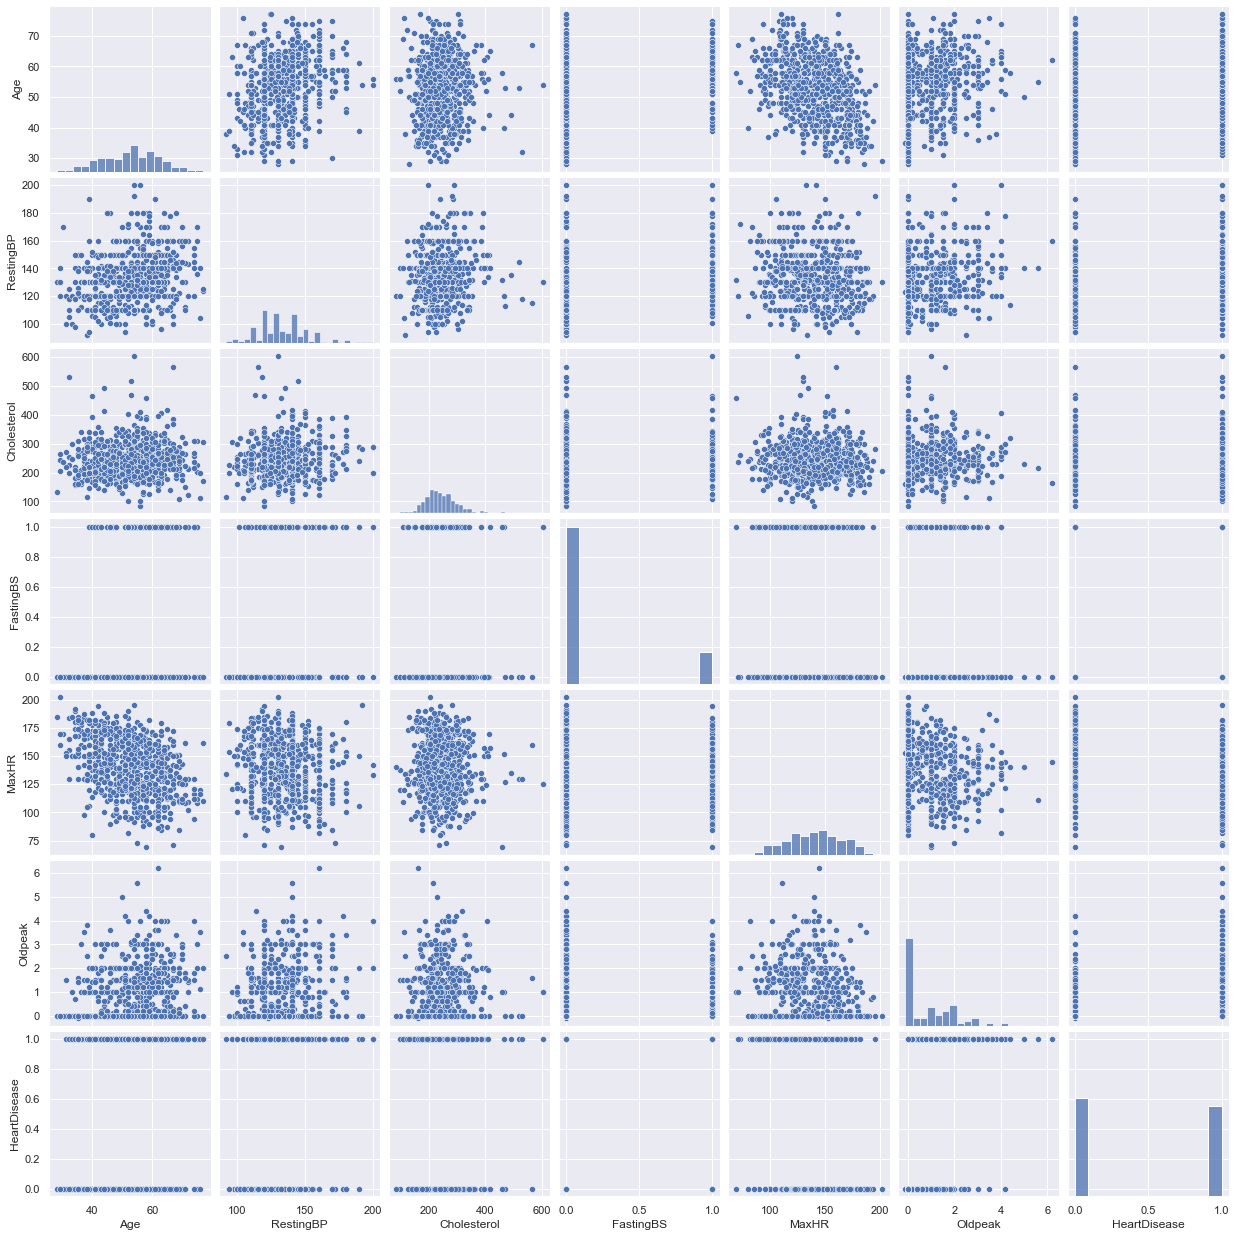

In [19]:
'''

------------------------------------------------------------------------------------------------------------------------

Now we have a singular binary column for Sex_M
I could have used 1-hot encoder to instead directly change the value from a 0-1 within the column.
But the disadvantage of that is that it wouldn't have changed the column name.
And having a name called 'Sex' and values 1 or 0 would be confusing.
You wouldn't know which was male or female.
This way the column is Sex_M
So we know that a 1 is male, and 0 is female, just by looking at the column name.

------------------------------------------------------------------------------------------------------------------------

Let's check the integrety of the data so long.

------------------------------------------------------------------------------------------------------------------------

'''

sns.pairplot(data)

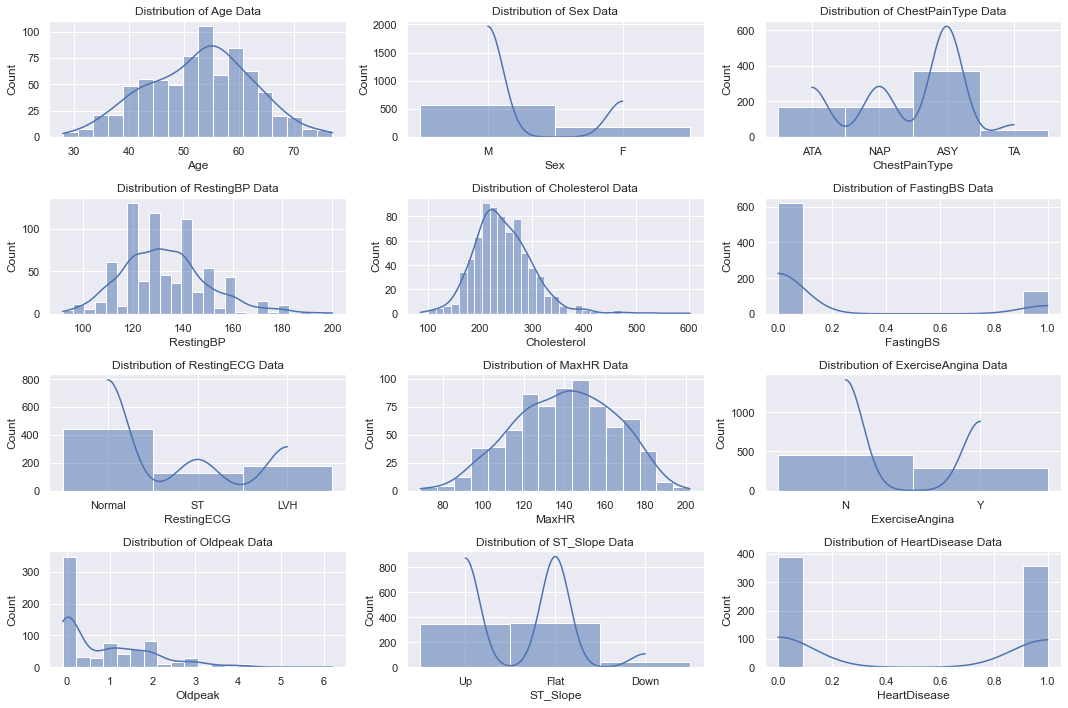

In [20]:
'''

------------------------------------------------------------------------------------------------------------------------

There doesn't seem to be any major issues or any major outliers.
But we are only looking at the numerical data.Age
Let's draw some distribution graphs to see the integretity and distribution of the categorical data as well.

------------------------------------------------------------------------------------------------------------------------

We will use matplotlib to draw the graphs.

------------------------------------------------------------------------------------------------------------------------

'''
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns,1):
    plt.subplot(4,3,i) #4 rows, 3 columns, and i is the number of the subplot  
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data[col],kde=True) #Setting Kernel Density Estimation (KDE) to True will draw a line, smoothing the distribution.
    plt.tight_layout()
    plt.plot()

<AxesSubplot:>

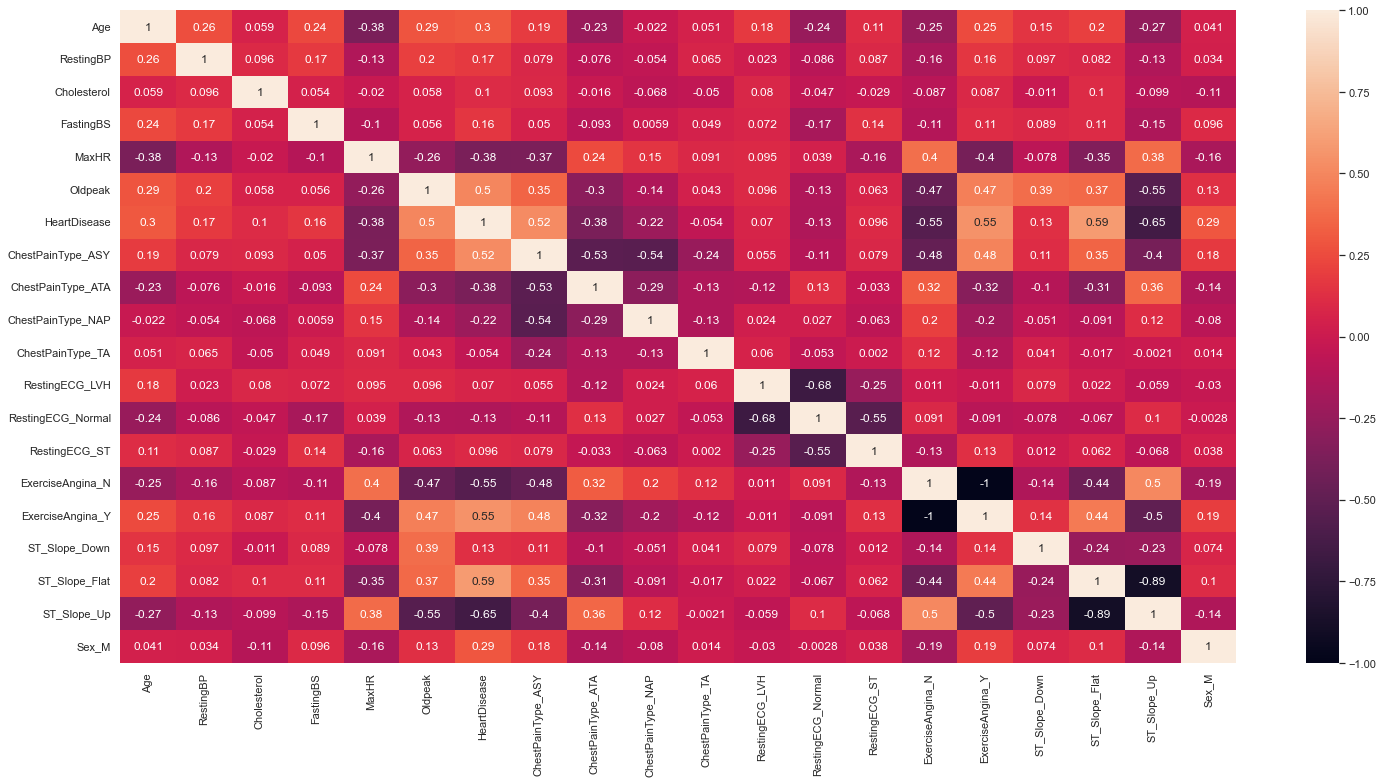

In [21]:
'''

------------------------------------------------------------------------------------------------------------------------

We see Age, RestingBP (Barely), Cholesterol and MaxHeartRate are all normally distributed.
We also see a good spread of 0s and 1s among heart disease.
We see very few records with an ST_Slope of down.

------------------------------------------------------------------------------------------------------------------------

So now we can output a heatmap to see the correlations between all the features.

------------------------------------------------------------------------------------------------------------------------

'''

sns.set(rc = {'figure.figsize':(25,12)})
sns.heatmap(dataFrameOne.corr(), annot=True) #We pass the correlation

<h3> Heart Disease Correlation

<img src="Images/HeartCorrelation1.png" width="1500" height = "200">

In [22]:
'''

------------------------------------------------------------------------------------------------------------------------

We get A LOT of information from this matrix, not only should we look at the features which have a high correlation to HeartDisease, we can also gain
information about the features which have close to no correlation to the HeartDisease variable. Because if the variable has no correlation to the target, then 
we know it doesn't affect it either.
So we know that resting ECG means nothing towards whether someone has heart disease or not.

Looking at the correlations we see a somewhat notible negative correlation between MaxHR and HeartDisease.
As well as notible positive correlation between Oldpeak and HeartDisease.
A interestingly high positive correlation between Asymptomatic chest pains and HeartDisease.
An interestinly high negative correlation between ATA chest pains and HeartDisease.

A very notable correlation between both Exercise Anginas and HeartDisease.
We notice that N and Y  have the same correlation but one is positive and one is negative.

A similar thing happens with slope down and slope flat.

------------------------------------------------------------------------------------------------------------------------

For now lets get a clearer picture of what is happening here, we can start with Sex.
Let's see how gender afftect heart disease.

------------------------------------------------------------------------------------------------------------------------

We Import plotly to build our graphs

------------------------------------------------------------------------------------------------------------------------
    
'''
import plotly.express as px

'''

------------------------------------------------------------------------------------------------------------------------

We then create a figure where we first pass the data we want to use. 
In this case we don't want to use the dataframe we created earlier, because it uses 
dummy values which would get in the way here.
So instead we want to pass the original dataset.

x is our X axis.
color refers to any additional information we want to add to the X axis to compare with the x variable.

------------------------------------------------------------------------------------------------------------------------

'''
fig=px.histogram(data, 
                 x="HeartDisease",
                 color="Sex",          
                 hover_data=data.columns,
                 title="Heart Disease for Males and Females",
                 barmode="group")

'''

------------------------------------------------------------------------------------------------------------------------

We can now output the figure

------------------------------------------------------------------------------------------------------------------------

'''
fig.show()



In [23]:
'''

---------------------------------------------------------------------------------------------------------------------------

We notice something very quickly here.
There seems to be a lot more males than females in this graph. 
That throws off the accuracy of what we are trying to see.
It would be difficult to get a clear picture when there are just so many more males than females.

---------------------------------------------------------------------------------------------------------------------------

Lets take a look at how many more males there are.

---------------------------------------------------------------------------------------------------------------------------

To do this we make the x variable look at Sex instead of HeartDisease

---------------------------------------------------------------------------------------------------------------------------

'''

fig=px.histogram(data, 
                 x="Sex",           
                 hover_data=data.columns,
                 title="Count for Males and Females",
                 barmode="group")
fig.show()



In [24]:
'''

---------------------------------------------------------------------------------------------------------------------------

Right away we see a large amount of male records with significanly fewer female records.
This brings in the question of how they obtained this data.
On the kaggle website they mention that the data was gathered from various sources.
But they don't go into specifics about how those sources collected this data.

As we look through more data we may find more clues about how this data was likely collected.

---------------------------------------------------------------------------------------------------------------------------

For now let's look at the graph a different way.
Instead of comparing the Heart disease to male and female.

We can instead compare males to males and females to females, while looking at how many have heart disease.

---------------------------------------------------------------------------------------------------------------------------

'''
fig=px.histogram(data, 
                 x="Sex",
                 color="HeartDisease",          
                 hover_data=data.columns,
                 title="Distribution of Heart Diseases for Male and Females",
                 barmode="group")
fig.show()


In [25]:
'''

---------------------------------------------------------------------------------------------------------------------------

Now this is very interesting, we see that the majority of Males tested had heart disease while the majority of females tested did not have heart disease.
It looks like men where significantly more likely to have heart disease.

If we assume that the data is collected when someone goes to the doctor we can come to interesting conclusions from this.
There are two things that may be true from this.

- Men may have a higher chance of getting Heart Disease.

and 

- Men may be less inclined to go to the doctor until they are sure something is wrong, while women may be more willing to go to the 
doctor at the first sign of something wrong.
-- This means that women may go in when they don't need to, while men only go in when they need to.
--- Which results in more false alarms from women and less false alarms from men.
---- There is something else in the dataset we can look at to get an idea of if this is the case.

---------------------------------------------------------------------------------------------------------------------------

To see if men only go when they are absolutely sure something is wrong we can look at the ChestPainType category.
If there is not a large amount of asymptomatic records from the men and a lot of asymptomatic records from the women then it
backs up the previous claim.

---------------------------------------------------------------------------------------------------------------------------

'''

fig=px.histogram(data, 
                 x="Sex",
                 color="ChestPainType",           
                 hover_data=data.columns,
                 title="Distribution of Chest pains for males and females",
                 barmode="group")
fig.show()

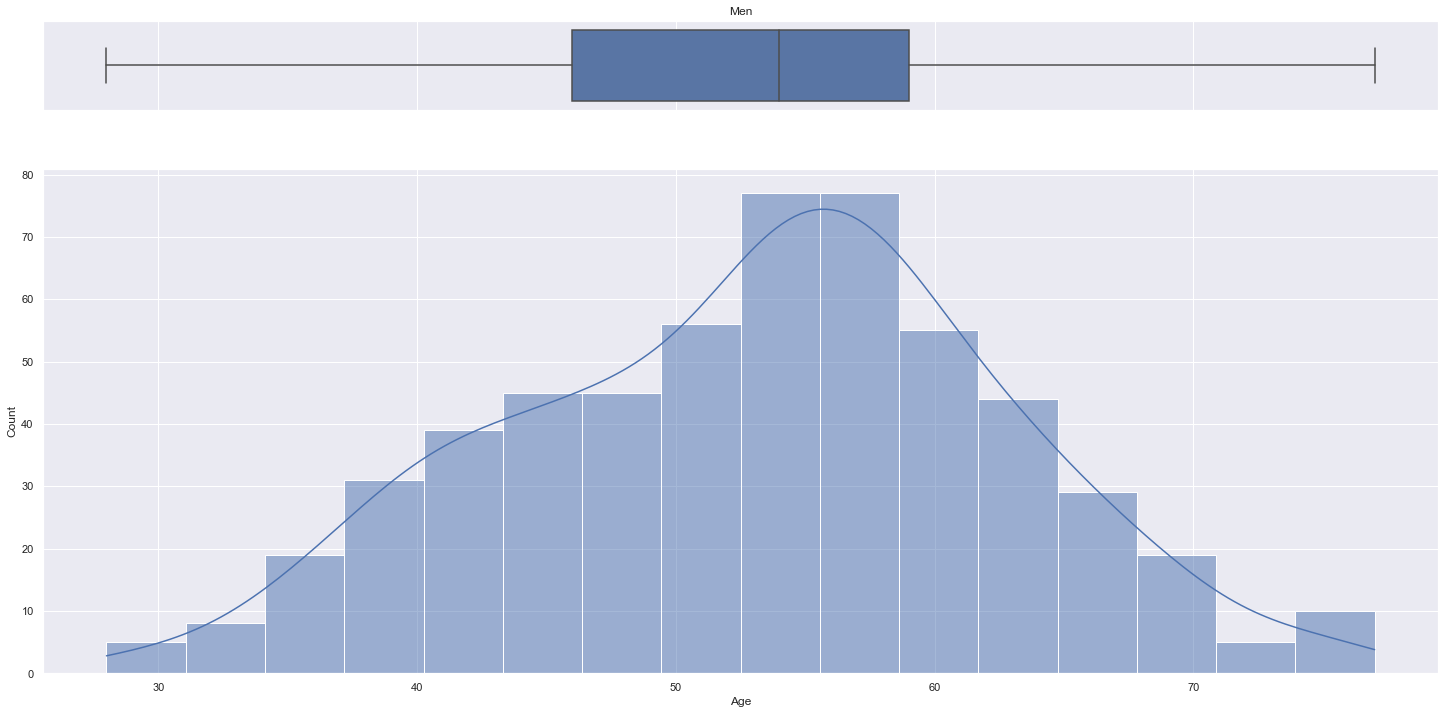

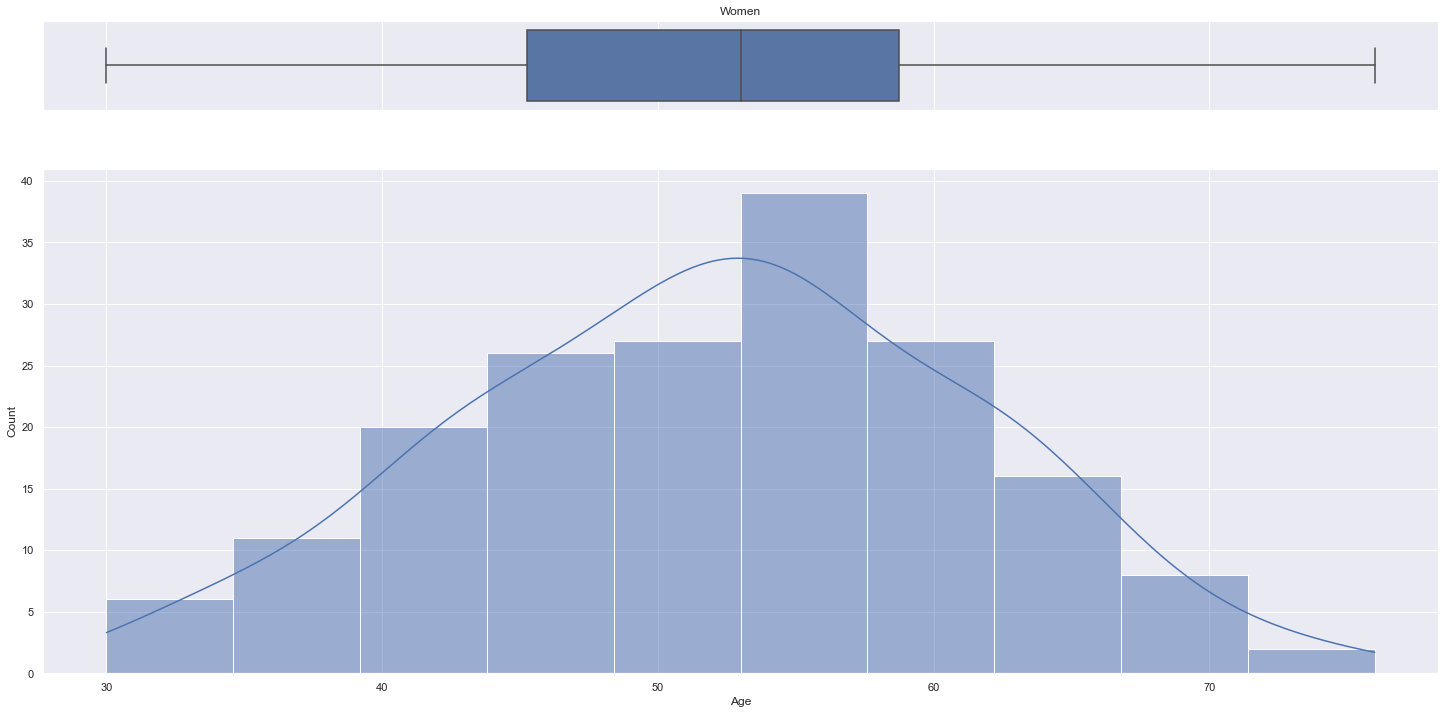


      Men records: 
      count    564.000000
mean      53.102837
std        9.556603
min       28.000000
25%       46.000000
50%       54.000000
75%       59.000000
max       77.000000
Name: Age, dtype: float64
      

      Females records: 
      count    182.000000
mean      52.197802
std        9.339774
min       30.000000
25%       45.250000
50%       53.000000
75%       58.750000
max       76.000000
Name: Age, dtype: float64
      


In [26]:
'''

---------------------------------------------------------------------------------------------------------------------------

I reject my hypothesis.

---------------------------------------------------------------------------------------------------------------------------

We see the complete opposite from what I previously guessed.
We see that the large majority of male records where asymptomatic, while the majority of female records was also asymptomatic,
but to a significantly smaller degree.

From this we can guess that the data is from a routine checkup and that men seem more inclined to go for said checkups.
We come to this conclusion because why would a man who has no symptoms go to the doctors.

But there is a problem with this conclusion again.

If this was just a sample of random people coming for a checkup, does that mean that the vast majority
of men suffer from heart disease?

It doesn't make much sense, or it's an extremely scary find.

There is more evidence to support that this may be the case.
If we look at the distribution of ages, we see that the majority of ages are within the mid-life stages.
Around the time that people generally start going for routine checkups.

---------------------------------------------------------------------------------------------------------------------------

We will use matplotlib to plot the data.
Let's create a box and whisker diagram to see how the data is distributed.
And a histogram to see the curve and distribution of the data.

---------------------------------------------------------------------------------------------------------------------------

'''

import matplotlib.pyplot as plt

'''

---------------------------------------------------------------------------------------------------------------------------

We want to split the data into two groups.
Men and woman and study them seperately to see if there is a difference.

------

'''
menData = data[data['Sex'] == 'M']
femaleData = data[data['Sex'] == 'F']

def createPlot(data,gender):
    sns.set(style="darkgrid") #Set the style of the graph using seaborn
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) #We want to plot two graphs on the same figure
    sns.boxplot(data=data,x='Age', ax=ax_box) #First one is a box and whisker diagram
    sns.histplot(data=data, x="Age", ax=ax_hist,kde=True) #Second one is a histogram
    ax_box.set(xlabel='')
    ax_box.set(title=gender)
    plt.show()

createPlot(menData,'Men')
createPlot(femaleData,'Women')

print(f'''
      Men records: 
      {menData['Age'].describe()}
      ''')
print(f'''
      Females records: 
      {femaleData['Age'].describe()}
      ''')

In [27]:
'''

---------------------------------------------------------------------------------------------------------------------------

Most of the records are from people in their 40s to 60s with not much variation between men and women.
This supports the concept that these are from regular checkups as most people would be going around that age.

But there is one more variable we can look at.

Let's look at the ExerciseAngina variable.
Which is simply if they had pain when they exercised.

---------------------------------------------------------------------------------------------------------------------------

'''
fig=px.histogram(data, 
                 x="ExerciseAngina",
                 color="ChestPainType",           
                 hover_data=data.columns,
                 title="Distribution of Chest pains ExerciseAngina",
                 barmode="group")
fig.show()

fig=px.histogram(data, 
                 x="ExerciseAngina",
                 color="HeartDisease",           
                 hover_data=data.columns,
                 title="Heart disease based on exercise anigna",
                 barmode="group")

fig.show()

In [28]:
'''

---------------------------------------------------------------------------------------------------------------------------

It all makes sense now.
At first you think, how could people who experienced chest pains from exercise be asymptomatic.
It's because they ONLY experience chest pains from exercise.
Passively they don't feel much pain, so they say they don't have chest pain for the ChestPainType category.
But they do have chest pain when they exercise.

---------------------------------------------------------------------------------------------------------------------------

So what happens is that a man will go gym.
Do hardcore exercise.
Experience chest pains.
And then go to the doctor about it.

---------------------------------------------------------------------------------------------------------------------------

Doctor  : "Why are you here"
Patient : "I had chest pains while exercising"
Doctor  : *Writes down Execise-induced-Angina* , "Does your chest hurt at the moment?"
Patient : "No"
Doctor  : *Writes down asymptomatic*.

---------------------------------------------------------------------------------------------------------------------------

We also see that the majority of Exercise angina cases result in Heart disease, while the majority that didn't experience and exercise 
Angina do not have Heart disease.
We also see that there are still some cases of people with heart disease that didn't experience exercise pains but still had heart disease.
These could just be people that didn't exercise at all.

But the data suggests that the stress from exercise could be an early warning sign of heart problems.

---------------------------------------------------------------------------------------------------------------------------

It's a shot in the dark but it could also explain why there are more men than women.
As women may be less likely to put themselves under that stress that level of physical stress.

---------------------------------------------------------------------------------------------------------------------------

I'm not suggesting that exercise causes heart disease, just that it can be a good indicator.

---------------------------------------------------------------------------------------------------------------------------

Now that we have a conclusion to where the data comes from, we can look at the data to see if we can find anything else that
might be interesting.

Let's start by looking at the ChestPainType variable.

---------------------------------------------------------------------------------------------------------------------------

'''

fig=px.histogram(data, 
                 x="ChestPainType",
                 color="HeartDisease",           
                 hover_data=data.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [29]:
'''

---------------------------------------------------------------------------------------------------------------------------

An extremely interesting observation is that the people with chest pains typically don't seem to have heart disease.
But the people who don't have chest pains do seem to be the ones with heart disease.

I'm not a doctor and have little knowedge about this but I would definitely start asking questions along the lines of:
-Does heart disease maybe prevent circulation to your chest, resulting in potentially a lack of feeling there.
-Is chest pain caused by strong circulation, which isn't present with heart disease.

All I know is that this is something a researcher would be interested in.

---------------------------------------------------------------------------------------------------------------------------

Let's now compare ages to heart disease.
We can use a box and whisker for this.

---------------------------------------------------------------------------------------------------------------------------

'''
fig = px.box(data,y="Age",x="HeartDisease",color="Sex",title=f"Distrubution of Age")
fig.show()

In [30]:
'''

---------------------------------------------------------------------------------------------------------------------------

Unsuprisingly, the average age seems to be higher for people who have heart disease.
With no real difference between women and men.
This makes sense as your heart gets weaker and more damaged over time.

---------------------------------------------------------------------------------------------------------------------------

Let's take a look at the ECG variable next.

---------------------------------------------------------------------------------------------------------------------------

'''
fig=px.histogram(data,
                 x="RestingECG",
                 color="HeartDisease",
                 hover_data=data.columns,
                 title="Heart Diseases by ECG",
                 barmode="group")
fig.show()

In [31]:
'''

---------------------------------------------------------------------------------------------------------------------------

We see that the ECG doesn't seem to matter too much.
You can make a case that the there is always a higher chance of heart disease regradless.
But that's because there are more records with heart disease compared to records without heart disease.

It is however noticible that the ST category does seem to matter a little bit with a high concentration of positive heart diseases.
But it's not by much. 
Especially since the majority of the data leans towards a normal ECG regardless.

---------------------------------------------------------------------------------------------------------------------------

Next we can look at cholesterol levels.
To visualise this we can look at scatterplots for people who have heart disease and people that don't

---------------------------------------------------------------------------------------------------------------------------

'''

fig = px.box(data,y="Cholesterol",x="HeartDisease",color="HeartDisease",title=f"Distrubution of Age")
fig.show()


In [32]:
'''

---------------------------------------------------------------------------------------------------------------------------

There doesn't seem to be much to gather from this.
The scatterplots look identical regardless of if they have heart disease or not.

---------------------------------------------------------------------------------------------------------------------------

'''
fig=px.histogram(data, 
                 x="HeartDisease",
                 color="FastingBS",           
                 hover_data=data.columns,
                 title="Fasting Blood Sugar vs Heart Disease", 
                 barmode="group")
fig.show()

fig=px.histogram(data, 
                 x="FastingBS",
                 color="HeartDisease",           
                 hover_data=data.columns,
                 title="Heart Disease vs Fasting Blood Sugar", 
                 barmode="group")
fig.show()

In [33]:
'''

---------------------------------------------------------------------------------------------------------------------------

Not much to gain from this either except for the fact that it seems you have a slightly higher chance of having heart disease
if your fasting blood sugar level is > 120 mg/dl.

---------------------------------------------------------------------------------------------------------------------------

Next let's take a look MaxHR

---------------------------------------------------------------------------------------------------------------------------

'''
fig = px.box(data,y="MaxHR",x="HeartDisease",color="HeartDisease",title=f"Max Heart Rate and Heart Disease Scatterplot")
fig.show()

In [34]:
'''

---------------------------------------------------------------------------------------------------------------------------

Interestingly enough we see that as the heart rate increases, the chance of having heart disease decreases.

---------------------------------------------------------------------------------------------------------------------------

Next we look at Resting Blood Pressure

--------------------------------------------------------------------------------------------------------------------------- 

'''

fig = px.box(data,y="RestingBP",x="HeartDisease",color="HeartDisease",title=f"Resting Blood Pressure and Heart Disease Scatterplot")
fig.show()


In [35]:
'''

---------------------------------------------------------------------------------------------------------------------------

It doesn't seem like Resting Blood pressure has a lot of impact on heart disease.
With both Scatterplots being close to identical.

---------------------------------------------------------------------------------------------------------------------------

'''
fig = px.box(data,y="Oldpeak",x="HeartDisease",color="HeartDisease",title=f"Oldpeak and Heart Disease Scatterplot")
fig.show()

In [36]:
'''

---------------------------------------------------------------------------------------------------------------------------

Now it seems quite interesting.
When the oldpeak is 0 your chance of heart disease is suprisingly low.
But if your oldpeak is > 0 your chance of heart disease is significantly higher.

---------------------------------------------------------------------------------------------------------------------------

The last variable to check is the ST slope.

---------------------------------------------------------------------------------------------------------------------------

'''
fig=px.histogram(data, 
                 x="ST_Slope",
                 color="HeartDisease",
                 hover_data=data.columns,
                 title="Fasting Blood Sugar vs Heart Disease",
                 barmode="group")
fig.show()


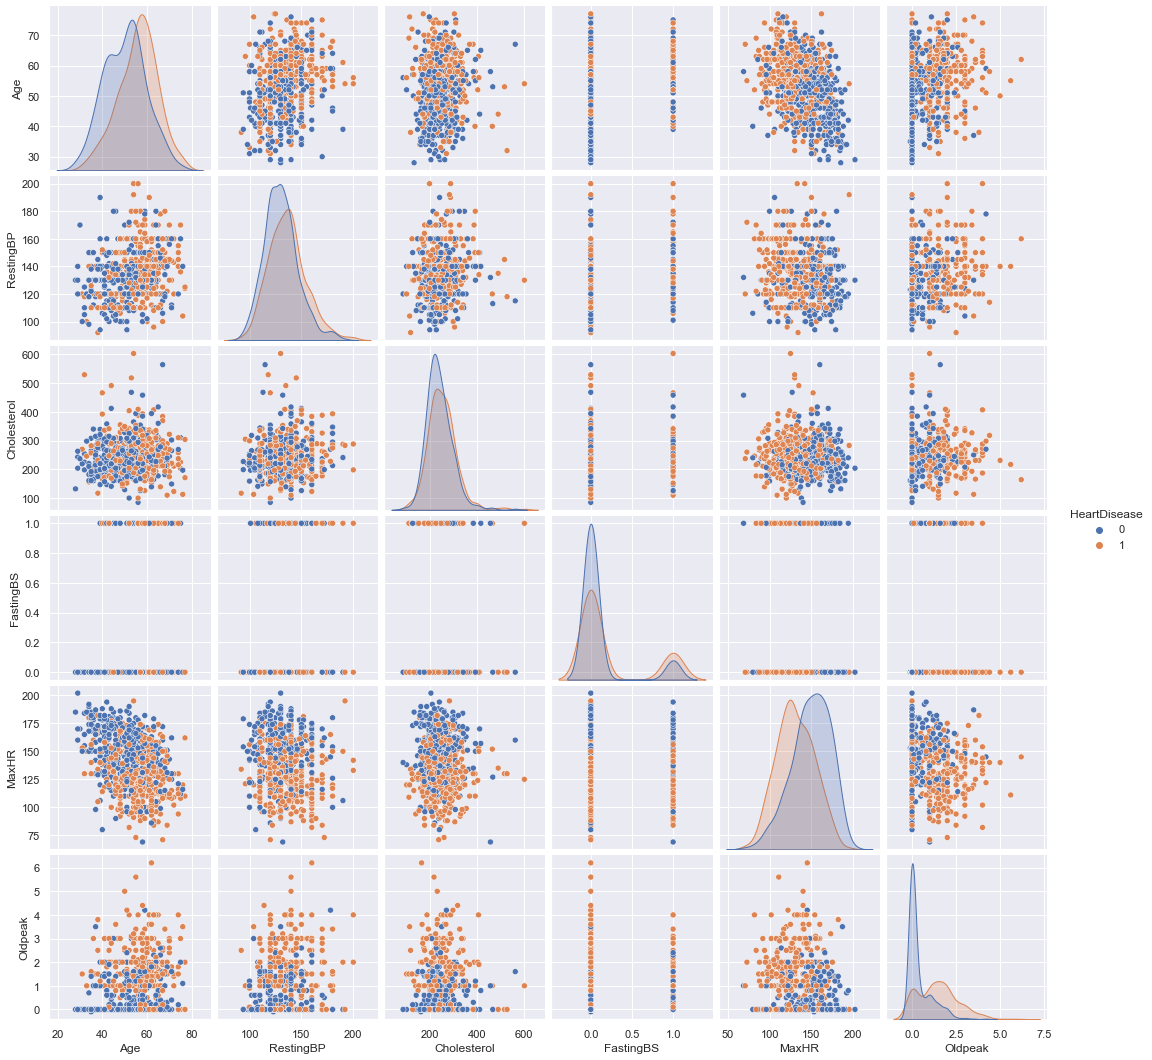

In [37]:
'''

---------------------------------------------------------------------------------------------------------------------------

BIG FIND: If your ST_Slope is going up then you have a dramatically reduced chance of having heart disease.
But if it's flat or down then the opposite is true.

---------------------------------------------------------------------------------------------------------------------------

Let's see how the numerical data is grouped together with regards to heart disease.
Paying special attention to the distribution graphs going down the middle diagonally.

---------------------------------------------------------------------------------------------------------------------------

'''
sns.pairplot(data, hue="HeartDisease")

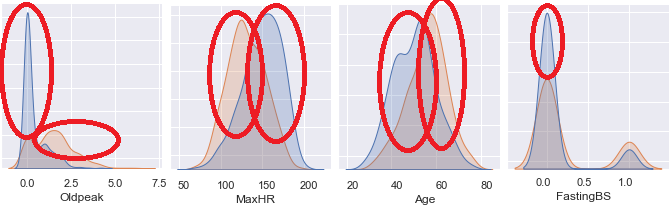

In [38]:
'''

---------------------------------------------------------------------------------------------------------------------------

We see some definite distinctions here with Oldpeak, MaxHR, Age and FastingBS
Where they so grouping based on the outcome of the heart disease.

---------------------------------------------------------------------------------------------------------------------------

'''
Image(filename='Images/grouping2.png') 


<h1>Conclusion

In [39]:
'''

---------------------------------------------------------------------------------------------------------------------------

We gained a lot from this data analysis.
-We found out that men are more likely to get heart disease.
-We found out that exercise is a good way to know if you could have heart disease.
-We found out that heart disease doesn't cause Chest pain passively.
-We found out that heart disease is more apparent in older people.
-We found out that an Oldpeak of > 0 increases your chance of having heart disease.
-We found out that a higher MaxHR lowers your chance of having heart disease.

---------------------------------------------------------------------------------------------------------------------------

Now we can move onto building the model

---------------------------------------------------------------------------------------------------------------------------

'''
print('End of Section')

End of Section


<img src="Images/section2.png" width="1500" height = "200">

In [40]:
'''

---------------------------------------------------------------------------------------------------------------------------

The next thing we should do is to break the data into an X variable and a y variable.
The X variable is the independent varaible and the y variable is the dependent variable.
In this case the y varaible is out target. Which is HeartDisease.
For the sake of accuracy our y variable will be everything that isn't the target.

---------------------------------------------------------------------------------------------------------------------------

'''
X = dataFrameOne.drop(['HeartDisease'],axis=1)
y = dataFrameOne['HeartDisease']

print(f'''
      The shape of X is {X.shape} and the type is {type(X)}
      The shape of y is {y.shape} and the type is {type(y)}
      ''')


      The shape of X is (746, 19) and the type is <class 'pandas.core.frame.DataFrame'>
      The shape of y is (746,) and the type is <class 'pandas.core.series.Series'>
      


In [41]:
'''

---------------------------------------------------------------------------------------------------------------------------

We see there are 746 records for both the X and y variables.
We see that the X variable has 19 rows while the y variable is flat.
The y variable is flat because it is a pandas series.

---------------------------------------------------------------------------------------------------------------------------

Let's take a look at the X columns

---------------------------------------------------------------------------------------------------------------------------

'''
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_M
0,40,140.0,289.0,0,172,0.0,0,1,0,0,0,1,0,1,0,0,0,1,1
1,49,160.0,180.0,0,156,1.0,0,0,1,0,0,1,0,1,0,0,1,0,0
2,37,130.0,283.0,0,98,0.0,0,1,0,0,0,0,1,1,0,0,0,1,1
3,48,138.0,214.0,0,108,1.5,1,0,0,0,0,1,0,0,1,0,1,0,0
4,54,150.0,195.0,0,122,0.0,0,0,1,0,0,1,0,1,0,0,0,1,1


In [42]:
'''

---------------------------------------------------------------------------------------------------------------------------

There is no heart disease column

---------------------------------------------------------------------------------------------------------------------------

let's take a look at the y columns

---------------------------------------------------------------------------------------------------------------------------

'''
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [43]:
'''

---------------------------------------------------------------------------------------------------------------------------

Looks good.

---------------------------------------------------------------------------------------------------------------------------

Let's scale down the numerical data.
This will help us to build a model that is more accurate and faster.
It will take all the numbers and scale them down to a range of 0 to 1.

---------------------------------------------------------------------------------------------------------------------------

For this we will use sklearn's MinMaxScaler and we will only scale the relevant columns.

---------------------------------------------------------------------------------------------------------------------------

'''
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
print(f'''
      The columns affected will be {num_cols}''')
X.head()




      The columns affected will be ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_M
0,0.244898,0.444444,0.393822,0,0.774436,0.015873,0,1,0,0,0,1,0,1,0,0,0,1,1
1,0.428571,0.629630,0.183398,0,0.654135,0.174603,0,0,1,0,0,1,0,1,0,0,1,0,0
2,0.183673,0.351852,0.382239,0,0.218045,0.015873,0,1,0,0,0,0,1,1,0,0,0,1,1
3,0.408163,0.425926,0.249035,0,0.293233,0.253968,1,0,0,0,0,1,0,0,1,0,1,0,0
4,0.530612,0.537037,0.212355,0,0.398496,0.015873,0,0,1,0,0,1,0,1,0,0,0,1,1


<AxesSubplot:xlabel='Age', ylabel='Count'>

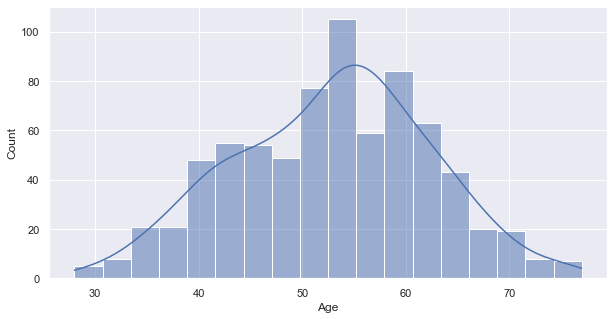

In [44]:
'''

---------------------------------------------------------------------------------------------------------------------------

Looks like it all went well.

---------------------------------------------------------------------------------------------------------------------------

Let's visualise what happened.
Let's look at age before and after being scaled.

---------------------------------------------------------------------------------------------------------------------------

BEFORE BEING SCALED:

---------------------------------------------------------------------------------------------------------------------------

'''

plt.figure(figsize=(10,5))
sns.histplot(data['Age'],kde=True) 


<AxesSubplot:xlabel='Age', ylabel='Count'>

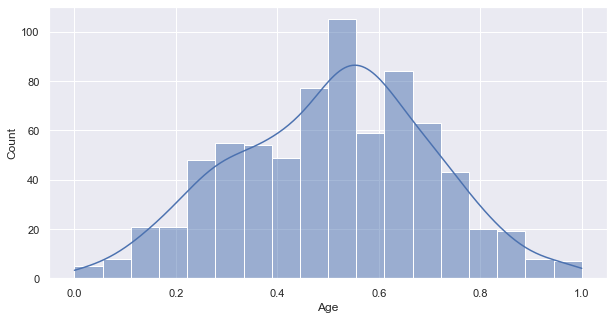

In [45]:
'''

---------------------------------------------------------------------------------------------------------------------------

AFTER IT WAS SCALED:

---------------------------------------------------------------------------------------------------------------------------

'''
plt.figure(figsize=(10,5))
sns.histplot(X['Age'],kde=True)

In [46]:
'''

---------------------------------------------------------------------------------------------------------------------------

We see that the distribution of the data has not changed at all. <-- Important to note.
Instead what has happened it that the scale of the X axis has been changed from being between 30 and 70
To being between 0 and 1.

---------------------------------------------------------------------------------------------------------------------------

The next step is to split the data into a training set and a test set.
We will NOT train the data using any of the testing data.

---------------------------------------------------------------------------------------------------------------------------

We will use the sklearn library to import the train_test_split function.
Which will automatically breakup our data.
For now we will use 80% training set and 20% test set.
And a random state of 42 to keep it consistent.

---------------------------------------------------------------------------------------------------------------------------

We are also not going to work with any scaled data.
The reason is that we are going to use a pipeline to scale the data anyway.
So this let's us analyse unscaled data but build the model using scaled data automatically.

---------------------------------------------------------------------------------------------------------------------------

'''

X = dataFrameOne.drop(['HeartDisease'],axis=1)
y = dataFrameOne['HeartDisease']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) 

In [47]:
'''

---------------------------------------------------------------------------------------------------------------------------

Let's take a look at the training data.

---------------------------------------------------------------------------------------------------------------------------

'''
X_train.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_M
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,52.837248,132.741611,245.050336,0.157718,140.256711,0.905369,0.498322,0.226510,0.224832,0.050336,0.231544,0.607383,0.161074,0.622483,0.377517,0.052013,0.476510,0.471477,0.750000
std,9.425445,17.095688,58.728495,0.364783,24.552182,1.062661,0.500417,0.418924,0.417822,0.218820,0.422173,0.488743,0.367908,0.485173,0.485173,0.222241,0.499867,0.499605,0.433376
min,29.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,120.000000,208.750000,0.000000,122.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000
50%,54.000000,130.000000,236.500000,0.000000,140.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,5.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2> Random Forest Classification

[0.825      0.79831933 0.82352941 0.77310924 0.78991597]
The average score was 0.8019747899159663
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        71
           1       0.90      0.66      0.76        79

    accuracy                           0.78       150
   macro avg       0.80      0.79      0.78       150
weighted avg       0.81      0.78      0.78       150



c:\Users\kglez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'Random Forest Classifier before hyper parameters')

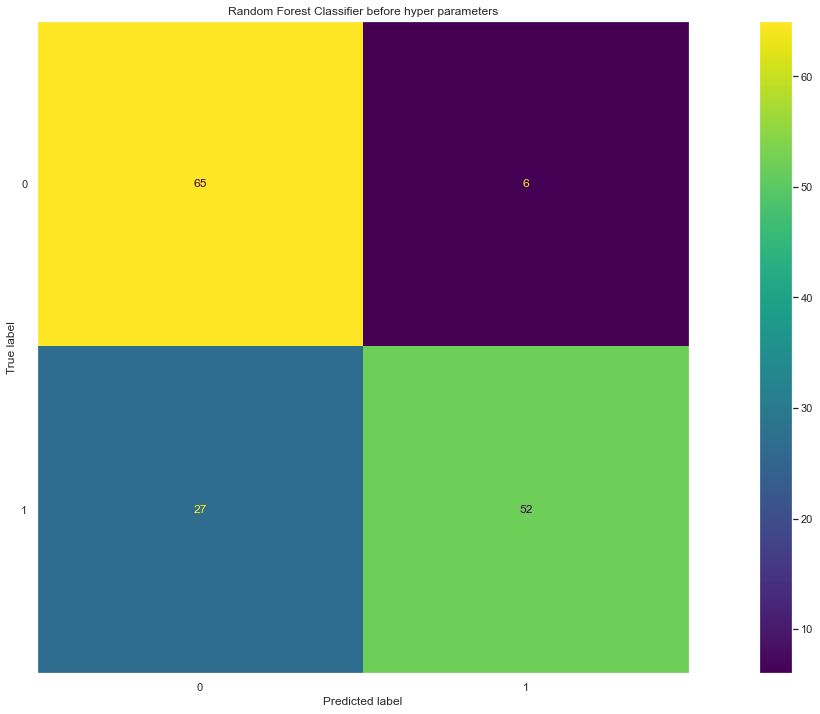

In [48]:
'''

---------------------------------------------------------------------------------------------------------------------------

We see that 80% of the data has gone into the X_train and y_train variables.
The remaining 20% will be in the X_test and y_test variables.

---------------------------------------------------------------------------------------------------------------------------

Let's first take a look at the random forest classification model.

---------------------------------------------------------------------------------------------------------------------------

First we import the nessicary classes.
For this we will need the RandomForestClassifier method and the make_pipeline method.
The pipeline will scale our data before training and testing the model.

We will also import the cross_val_score function from sklearn.
Which is basically same as the K-folds method.
Except it does it in one line.

---------------------------------------------------------------------------------------------------------------------------

'''

from sklearn.metrics import plot_confusion_matrix, classification_report,accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

'''

---------------------------------------------------------------------------------------------------------------------------

Let's create a simple pipeline.

It will scale down any numerical data and then train the model.

In this case we pass it the RandomForestClassifier method.

---------------------------------------------------------------------------------------------------------------------------

'''
rf_pipe = make_pipeline(scaler, RandomForestClassifier(n_estimators=4)) #We use 4 trees

rf_pipe.fit(X_train, y_train) #We fit the model

outputs = cross_val_score(rf_pipe, X_train, y_train, cv=5, scoring='accuracy') #We get outputs
averageScore_rf = outputs.mean() #We get the average score
y_pred = rf_pipe.predict(X_test) #We get the predictions
print(outputs)
print(f'The average score was {averageScore_rf}')

print(classification_report(y_test, y_pred))
plot_confusion_matrix(rf_pipe, X_test, y_test)
plt.grid(False)
plt.title('Random Forest Classifier before hyper parameters')


In [49]:
'''

---------------------------------------------------------------------------------------------------------------------------

The cross_val_score automatically shuffles the data, so the output will not be the same each time.
But from my testing it seems to be around 80% accurate.

---------------------------------------------------------------------------------------------------------------------------

When we look at the confusion matrix we see quite a few false negatives.
During my testing I got 15 false negatives.
Which could have resulted in a up to 15 deaths if this model was taken seriously.

---------------------------------------------------------------------------------------------------------------------------

Let's introduce hyper parameters.
Where we wil test for a bunch of different values.
To see which ones results in the highest accuracy.

---------------------------------------------------------------------------------------------------------------------------

Our first step is to create a dictionary of hyper parameters.

---------------------------------------------------------------------------------------------------------------------------

'''
#Number of trees 
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

#Number of features to consider at every split
max_features = ['auto', 'sqrt']

#Maximum number of levels in tree
max_depth = [2,4]

#Minimum number of samples required to split a node
min_sample_split = [2, 5]

#Minimum number of samples required at each leaf node
min_sample_leaf = [1, 2]

#Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = [{'n_estimators': n_estimators, 
               'max_features': max_features, 
               'max_depth': max_depth, 
               'min_samples_split': min_sample_split, 
               'min_samples_leaf': min_sample_leaf, 
               'bootstrap': bootstrap}]

print(param_grid)

[{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}]


In [50]:
'''

---------------------------------------------------------------------------------------------------------------------------

Now that we have our parameters we can import the gridsearchcv method from sklearn.
This method will test every parameter combination and return the best one.

---------------------------------------------------------------------------------------------------------------------------

'''
from sklearn.model_selection import GridSearchCV

'''

---------------------------------------------------------------------------------------------------------------------------

Cv is the number of folds, 
our param_grid is the hyper parameters, n_jobs is the number of cores to use, and 
verbose is the amount of information to print.

---------------------------------------------------------------------------------------------------------------------------

'''
rf_Grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv = 5, n_jobs = 4, verbose = 2)#
rf_Grid.fit(X_train, y_train)
bestParams = rf_Grid.best_params_
print(f'''
      n_estimators: {bestParams["n_estimators"]}
      min_samples_split: {bestParams["min_samples_split"]}
      min_samples_leaf: {bestParams["min_samples_leaf"]}
      max_features: {bestParams["max_features"]}
      max_depth: {bestParams["max_depth"]}
      bootstrap: {bestParams["bootstrap"]}''')

Fitting 5 folds for each of 320 candidates, totalling 1600 fits

      n_estimators: 56
      min_samples_split: 5
      min_samples_leaf: 2
      max_features: sqrt
      max_depth: 4
      bootstrap: False


In [51]:
'''

---------------------------------------------------------------------------------------------------------------------------

Now that we know the best parameters we can create a new pipeline with those parameters.

---------------------------------------------------------------------------------------------------------------------------

'''
rf_pipe = make_pipeline(scaler, RandomForestClassifier(n_estimators=bestParams['n_estimators'], max_features=bestParams['max_features'], max_depth=bestParams['max_depth'], min_samples_split=bestParams['min_samples_split'], min_samples_leaf=bestParams['min_samples_leaf'], bootstrap=bestParams['bootstrap']))


In [52]:
'''

---------------------------------------------------------------------------------------------------------------------------

Let's refit the pipeline for good measure and then check the new accuracy score.

---------------------------------------------------------------------------------------------------------------------------

'''
rf_pipe.fit(X_train, y_train)
averageScore_rf = cross_val_score(rf_pipe, X_train, y_train, cv=5, scoring='accuracy')
print(averageScore_rf)
print(averageScore_rf.mean())




[0.85       0.85714286 0.88235294 0.79831933 0.85714286]
0.8489915966386553


In [53]:
'''

---------------------------------------------------------------------------------------------------------------------------

We see a significant increase in accuracy.
From my testing it seems to be around 85% accurate.

---------------------------------------------------------------------------------------------------------------------------

Now let's create the model with those parameters and test the accuracy against the never been seen test data.

---------------------------------------------------------------------------------------------------------------------------

'''
from sklearn.metrics import accuracy_score

rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_test)
finalAccuracy_rf = accuracy_score(y_test, y_pred)
print(finalAccuracy_rf)

0.8866666666666667


              precision    recall  f1-score   support

           0       0.89      0.87      0.88        71
           1       0.89      0.90      0.89        79

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



c:\Users\kglez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'Random Forest Classifier')

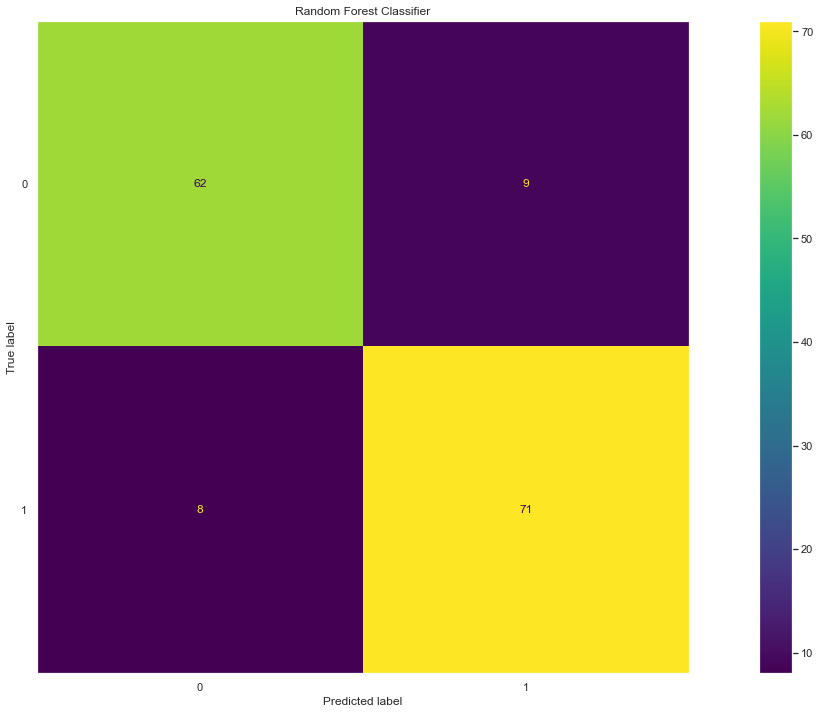

In [54]:
'''

---------------------------------------------------------------------------------------------------------------------------

Amazingly with the hyper parameters we are getting around a 88-90% accuracy.

---------------------------------------------------------------------------------------------------------------------------

Let's output a report and a confusion matrix to see how well our model did.

---------------------------------------------------------------------------------------------------------------------------

'''
from sklearn.metrics import plot_confusion_matrix, classification_report,accuracy_score

print(classification_report(y_test, y_pred))
plot_confusion_matrix(rf_pipe, X_test, y_test)
plt.grid(False)
plt.title('Random Forest Classifier')

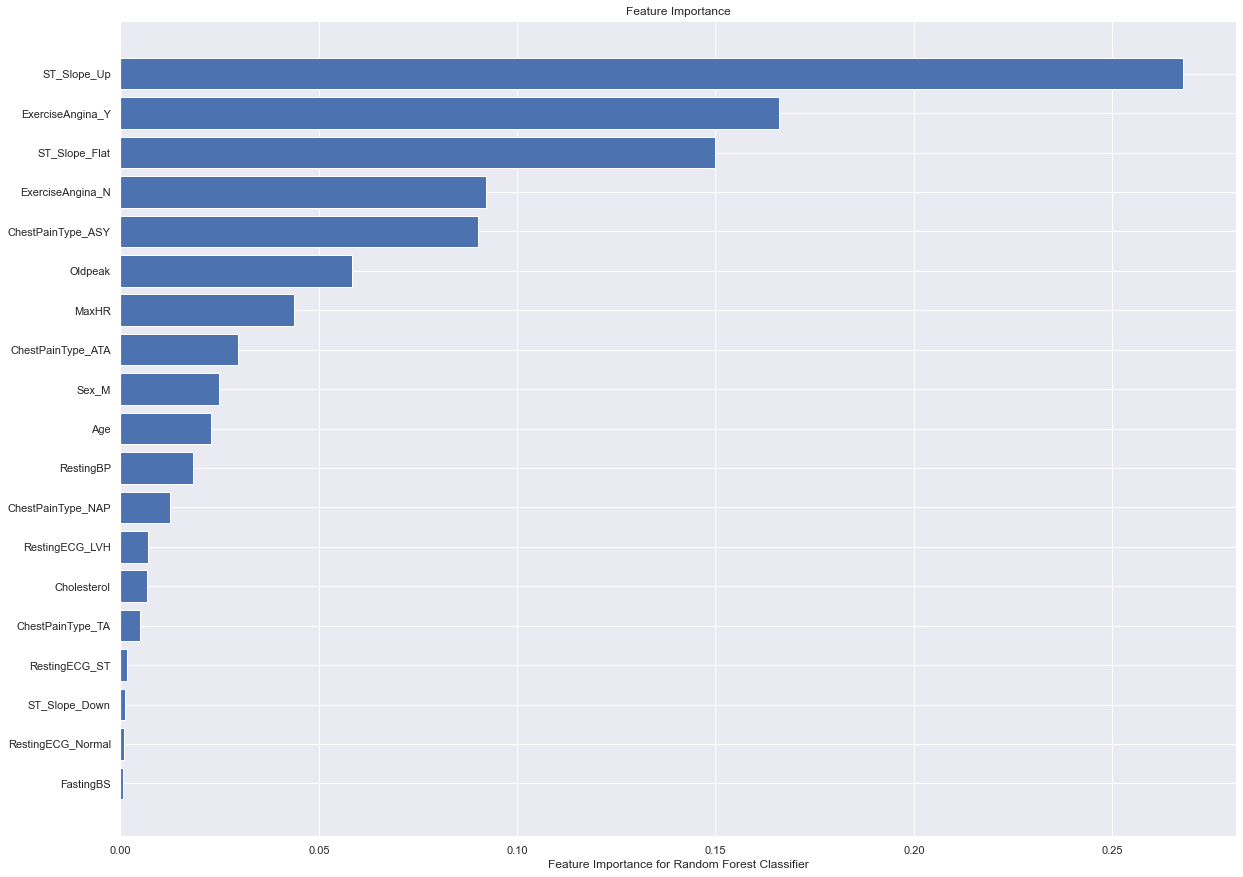

In [55]:
'''

---------------------------------------------------------------------------------------------------------------------------

The model scored very well across the board and the confusion matrix shows 63 correct falses and 70 correct trues. (During my testing)
There were however 6 cases where the model said the person did NOT have heart disease when they actually did. 
This is significantly better than the 15 before hyper parameters.
However, this incorrect prediction could have costed them their lives.
So this model is to be taken with a grain of salt.

---------------------------------------------------------------------------------------------------------------------------

One last interesting thing we can do with the Random forest classifier is see the level of important for each feature.

---------------------------------------------------------------------------------------------------------------------------

'''
def featureImportance(model,label):
    feature_col_tree = X.columns.to_list()
    
    X_train_scaled = scaler.fit_transform(X_train)
    model.fit(X_train_scaled, y_train)
    plt.figure(figsize=(20,15))
    importance = model.feature_importances_
    idxs = np.argsort(importance)
    plt.title("Feature Importance")
    plt.barh(range(len(idxs)),importance[idxs],align="center")
    plt.yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])
    plt.xlabel(label)
    plt.show()

model = RandomForestClassifier(n_estimators=bestParams['n_estimators'], max_features=bestParams['max_features'], max_depth=bestParams['max_depth'], min_samples_split=bestParams['min_samples_split'], min_samples_leaf=bestParams['min_samples_leaf'], bootstrap=bestParams['bootstrap'])
featureImportance(model, "Feature Importance for Random Forest Classifier")

In [56]:
'''

---------------------------------------------------------------------------------------------------------------------------

Looks like the slope variables are the most important. (Except ST_Slope_Down)
It's interesting to look at these variables and see if our data analysis was correct.
So far it looks like it was.

---------------------------------------------------------------------------------------------------------------------------

'''

"\n\n---------------------------------------------------------------------------------------------------------------------------\n\nLooks like the slope variables are the most important. (Except ST_Slope_Down)\nIt's interesting to look at these variables and see if our data analysis was correct.\nSo far it looks like it was.\n\n---------------------------------------------------------------------------------------------------------------------------\n\n"

<h2> Naive Bayes Classifier

[0.61666667 0.54621849 0.58823529 0.6302521  0.6302521 ]
The average score was 0.6023249299719888
              precision    recall  f1-score   support

           0       0.52      1.00      0.69        71
           1       1.00      0.18      0.30        79

    accuracy                           0.57       150
   macro avg       0.76      0.59      0.49       150
weighted avg       0.77      0.57      0.48       150



c:\Users\kglez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



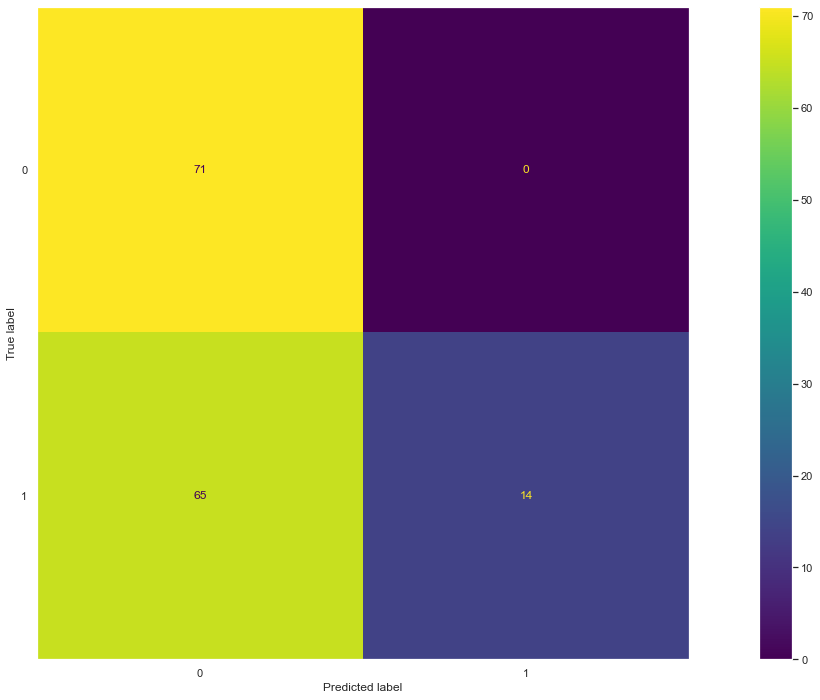

In [57]:
'''

---------------------------------------------------------------------------------------------------------------------------



---------------------------------------------------------------------------------------------------------------------------

Next we can look at the Naive Bayes Classifier model

---------------------------------------------------------------------------------------------------------------------------

'''
from sklearn.naive_bayes import GaussianNB

nb_pipe = make_pipeline(scaler, GaussianNB(var_smoothing=50)) 

nb_pipe.fit(X_train, y_train) #We fit the model

outputs = cross_val_score(nb_pipe, X_train, y_train, cv=5, scoring='accuracy') #We get outputs
averageScore = outputs.mean() #We get the average score

print(outputs)
print(f'The average score was {averageScore}')

y_pred = nb_pipe.predict(X_test) #We get the predictions
print(classification_report(y_test, y_pred))
plot_confusion_matrix(nb_pipe, X_test, y_test)
plt.grid(False)


In [58]:
'''

---------------------------------------------------------------------------------------------------------------------------

Arguably due to me purposely putting a terrible value into the var_smoothing parameter for demonstration purposes,
The accuracy score is quite bad.

---------------------------------------------------------------------------------------------------------------------------

Let's increase it with hyper parameters.

---------------------------------------------------------------------------------------------------------------------------

'''

#Widens or smooths the curve of the Gaussian distribution
var_smoothing = np.logspace(0,-9, num=100)



param_grid = [{'var_smoothing': var_smoothing}]

Nb_grid = GridSearchCV(estimator = GaussianNB(), param_grid = param_grid, cv = 5, n_jobs = 4, verbose = 2)#
Nb_grid.fit(X_train, y_train)
bestParams = Nb_grid.best_params_
print(f'''
      Smoothing: {bestParams["var_smoothing"]}
      ''')


Fitting 5 folds for each of 100 candidates, totalling 500 fits

      Smoothing: 2.310129700083158e-05
      


In [59]:
'''

---------------------------------------------------------------------------------------------------------------------------

So the best smoothing input is described above.

---------------------------------------------------------------------------------------------------------------------------

Let's plug the value in.

---------------------------------------------------------------------------------------------------------------------------

'''
nb_pipe = make_pipeline(scaler, GaussianNB(var_smoothing=bestParams['var_smoothing']))
nb_pipe.fit(X_train, y_train)
averageScore_nb = cross_val_score(nb_pipe, X_train, y_train, cv=5, scoring='accuracy')
print(averageScore_nb)
print(averageScore_nb.mean())


[0.84166667 0.8487395  0.86554622 0.80672269 0.84033613]
0.8406022408963585


In [60]:
'''

---------------------------------------------------------------------------------------------------------------------------

It seems to be pretty accurate.

---------------------------------------------------------------------------------------------------------------------------

Let's create the full model and test the accuracy against the never been seen test data.

---------------------------------------------------------------------------------------------------------------------------

'''
nb_pipe.fit(X_train, y_train)
y_pred = nb_pipe.predict(X_test)
finalAccuracy_nb = accuracy_score(y_test, y_pred)
print(finalAccuracy_nb)


0.8666666666666667


              precision    recall  f1-score   support

           0       0.85      0.87      0.86        71
           1       0.88      0.86      0.87        79

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



c:\Users\kglez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'Naive bayes')

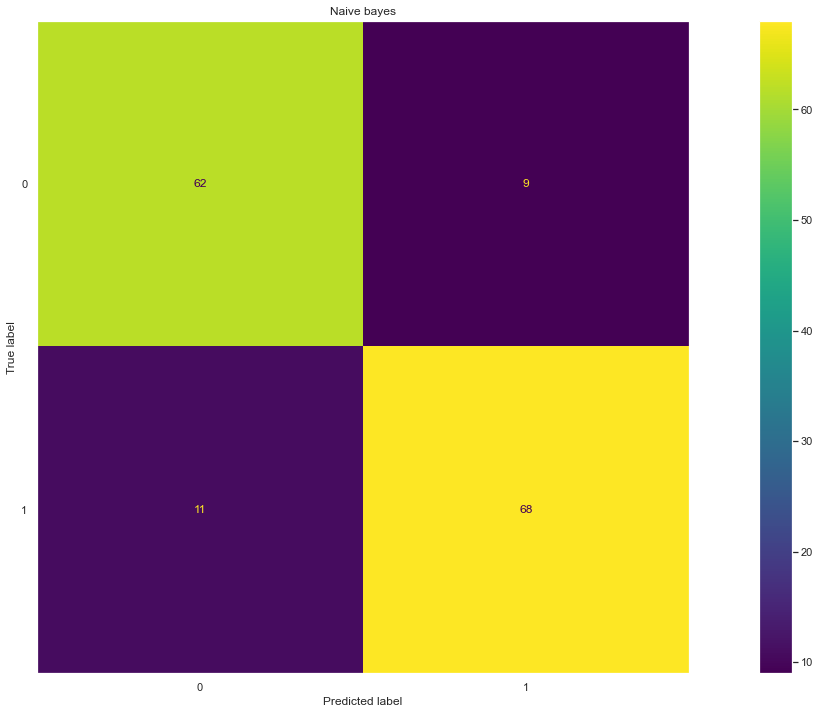

In [61]:
'''

---------------------------------------------------------------------------------------------------------------------------

Let's create a report.

---------------------------------------------------------------------------------------------------------------------------

'''
print(classification_report(y_test, y_pred))
plot_confusion_matrix(nb_pipe, X_test, y_test)
plt.grid(False)
plt.title('Naive bayes')

In [62]:
'''

---------------------------------------------------------------------------------------------------------------------------

The model is pretty good.
But not as good as the Random Forest model.

---------------------------------------------------------------------------------------------------------------------------

Now that we have the concept down, let's rapid fire through the other popular models.

---------------------------------------------------------------------------------------------------------------------------

'''


"\n\n---------------------------------------------------------------------------------------------------------------------------\n\nThe model is pretty good.\nBut not as good as the Random Forest model.\n\n---------------------------------------------------------------------------------------------------------------------------\n\nNow that we have the concept down, let's rapid fire through the other popular models.\n\n---------------------------------------------------------------------------------------------------------------------------\n\n"

<h2>K-Nearest Neighbour

In [63]:
'''

---------------------------------------------------------------------------------------------------------------------------

The k-nearest neighbour model looks at the k nearest neighbours and then predicts the class of the test data.

---------------------------------------------------------------------------------------------------------------------------

'''
from sklearn.neighbors import KNeighborsClassifier

knn_pipe = make_pipeline(scaler, KNeighborsClassifier(n_neighbors=2))
knn_pipe.fit(X_train, y_train) #We fit the model
outputs = cross_val_score(knn_pipe, X_train, y_train, cv=5, scoring='accuracy') #We get outputs
averageScore = outputs.mean() #We get the average score
print(outputs)
print(f'The average score was {averageScore}')

[0.81666667 0.77310924 0.79831933 0.78151261 0.84033613]
The average score was 0.8019887955182072


In [64]:
'''

---------------------------------------------------------------------------------------------------------------------------

Create the parameters

---------------------------------------------------------------------------------------------------------------------------

'''
#Leaf size passed to BallTree or KDTree.
leaf_size = np.logspace(0,-9, num=100)

#Number of neighbors to use.
n_neighbors = np.arange(1,22,step=2)

'''
uniform : uniform weights. All points in each neighborhood are weighted equally.
distance : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

weights = ['uniform', 'distance'] <-- We are going to leave these out because they take an hour to process

---------------------------------------------------------------------------------------------------------------------------

Algorithm used to compute the nearest neighbors

algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'] <-- We are going to leave these out because they take an hour to process
'''

p = [1,2]

param_grid = [{'p': p, 'leaf_size': leaf_size, 'n_neighbors': n_neighbors}]
print(param_grid)



[{'p': [1, 2], 'leaf_size': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.87381742e-05, 1.51991108e-05, 1.23284674

In [65]:
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = param_grid, cv = 5, n_jobs = 4, verbose = 2)#
knn_grid.fit(X_train, y_train)
bestParams = knn_grid.best_params_
print(f'''
      p: {bestParams["p"]}
      leaf_size: {bestParams["leaf_size"]}
      n_neighbors: {bestParams["n_neighbors"]}     
      ''')

Fitting 5 folds for each of 2200 candidates, totalling 11000 fits

      p: 1
      leaf_size: 1.0
      n_neighbors: 17     
      


In [66]:
knn_pipe = make_pipeline(scaler, KNeighborsClassifier(p=bestParams['p'], leaf_size=bestParams['leaf_size'], n_neighbors=bestParams['n_neighbors']))
knn_pipe.fit(X_train, y_train)
averageScore_knn = cross_val_score(knn_pipe, X_train, y_train, cv=5, scoring='accuracy').mean()
print(averageScore_knn)

0.8489775910364145


              precision    recall  f1-score   support

           0       0.88      0.89      0.88        71
           1       0.90      0.89      0.89        79

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



c:\Users\kglez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'K-nearest Neighbour')

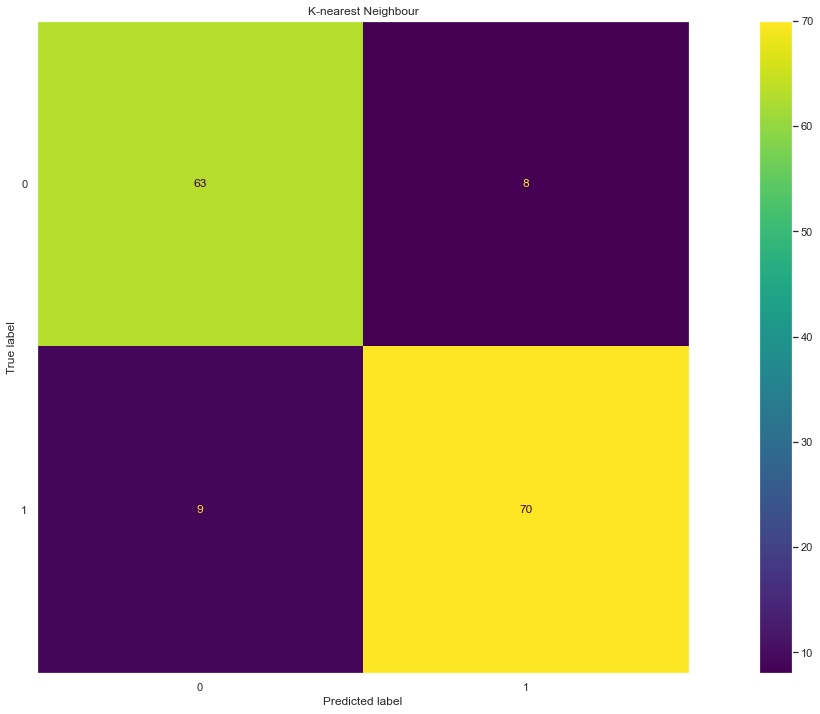

In [67]:
y_pred = knn_pipe.predict(X_test)
finalAccuracy_knn = accuracy_score(y_test, y_pred)


print(classification_report(y_test, y_pred))
plot_confusion_matrix(knn_pipe, X_test, y_test)
plt.grid(False)
plt.title('K-nearest Neighbour')

<h2>Support Vector Machines

In [68]:
from sklearn import svm

svc_pipe = make_pipeline(scaler, svm.SVC(C=20))
svc_pipe.fit(X_train, y_train) #We fit the model
outputs = cross_val_score(svc_pipe, X_train, y_train, cv=5, scoring='accuracy') #We get outputs
averageScore = outputs.mean() #We get the average score
print(outputs)
print(f'The average score was {averageScore}')

[0.825      0.84033613 0.8487395  0.74789916 0.87394958]
The average score was 0.8271848739495798


In [69]:
'''

---------------------------------------------------------------------------------------------------------------------------

We create the parameters

---------------------------------------------------------------------------------------------------------------------------

'''

#Regularization parameter. The strength of the regularization is inversely proportional to C.
C = [0.1, 1, 10, 100, 1000]

#Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
gamma = [1, 0.1, 0.01, 0.001, 0.0001]

#Specifies the kernel type to be used in the algorithm.
kernel = ['rbf']

param_grid = [{'C': C, 'gamma': gamma, 'kernel': kernel}]
print(param_grid)

[{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}]


In [70]:
svc_grid = GridSearchCV(estimator = svm.SVC(), param_grid = param_grid, cv = 5, n_jobs = 4, verbose = 2)#
svc_grid.fit(X_train, y_train)
bestParams = svc_grid.best_params_
print(f'''
      C: {bestParams["C"]}
      gamma: {bestParams["gamma"]}
      kernel: {bestParams["kernel"]}
      ''')

Fitting 5 folds for each of 25 candidates, totalling 125 fits

      C: 100
      gamma: 0.0001
      kernel: rbf
      


In [71]:
svc_pipe = make_pipeline(scaler, svm.SVC(C=bestParams['C'], gamma=bestParams['gamma'], kernel=bestParams['kernel']))
svc_pipe.fit(X_train, y_train)
averageScore_svc = cross_val_score(svc_pipe, X_train, y_train, cv=5, scoring='accuracy').mean()
print(averageScore_svc)

0.8456442577030812


              precision    recall  f1-score   support

           0       0.90      0.89      0.89        71
           1       0.90      0.91      0.91        79

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150



c:\Users\kglez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'SVC')

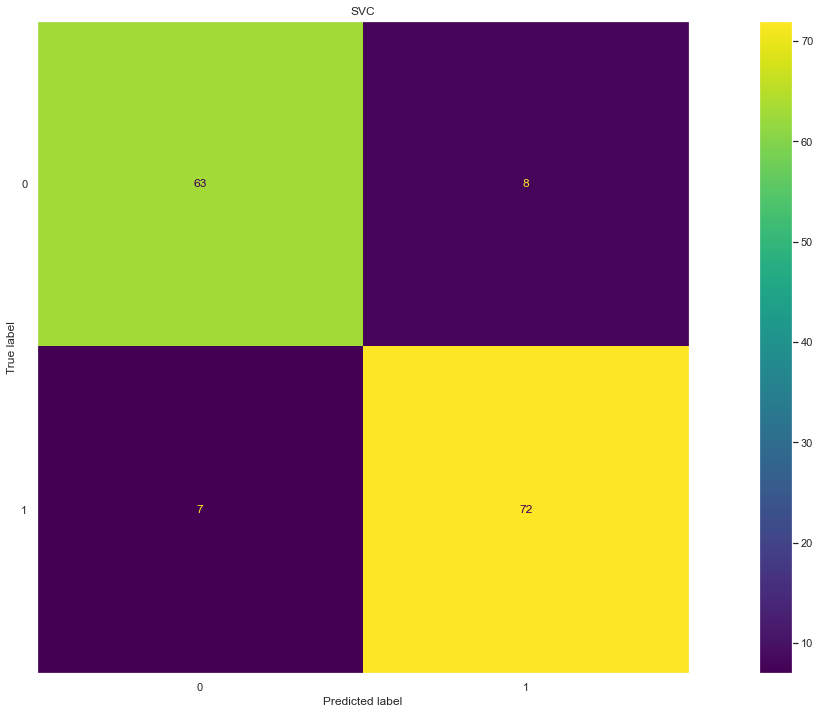

In [72]:
y_pred = svc_pipe.predict(X_test)
finalAccuracy_svc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(svc_pipe, X_test, y_test)
plt.grid(False)
plt.title('SVC')

In [73]:
from sklearn.tree import DecisionTreeClassifier

dt_pipe = make_pipeline(scaler, DecisionTreeClassifier())
dt_pipe.fit(X_train, y_train) #We fit the model
outputs = cross_val_score(dt_pipe, X_train, y_train, cv=5, scoring='accuracy') #We get outputs
averageScore = outputs.mean() #We get the average score
print(outputs)
print(f'The average score was {averageScore}')

[0.76666667 0.77310924 0.80672269 0.71428571 0.76470588]
The average score was 0.7650980392156863


In [74]:
'''

---------------------------------------------------------------------------------------------------------------------------

We create the parameters

---------------------------------------------------------------------------------------------------------------------------

'''

#The maximum number of nodes the tree can have. The by limiting the nodes you can prevent overfitting.
max_depth = np.arange(1,200,step=10)

param_grid = [{'max_depth': max_depth}]
print(param_grid)

[{'max_depth': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191])}]


In [75]:
dt_grid = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param_grid, cv = 5, n_jobs = 4, verbose = 2)#
dt_grid.fit(X_train, y_train)
bestParams = dt_grid.best_params_
print(f'''
        max_depth: {bestParams["max_depth"]}
      ''')

Fitting 5 folds for each of 20 candidates, totalling 100 fits

        max_depth: 1
      


In [76]:
dt_pipe = make_pipeline(scaler, DecisionTreeClassifier(max_depth=bestParams['max_depth']))
dt_pipe.fit(X_train, y_train)
averageScore_dt = cross_val_score(dt_pipe, X_train, y_train, cv=5, scoring='accuracy').mean()
print(averageScore_dt)

0.8154621848739495


              precision    recall  f1-score   support

           0       0.87      0.83      0.85        71
           1       0.85      0.89      0.87        79

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150



c:\Users\kglez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'DT')

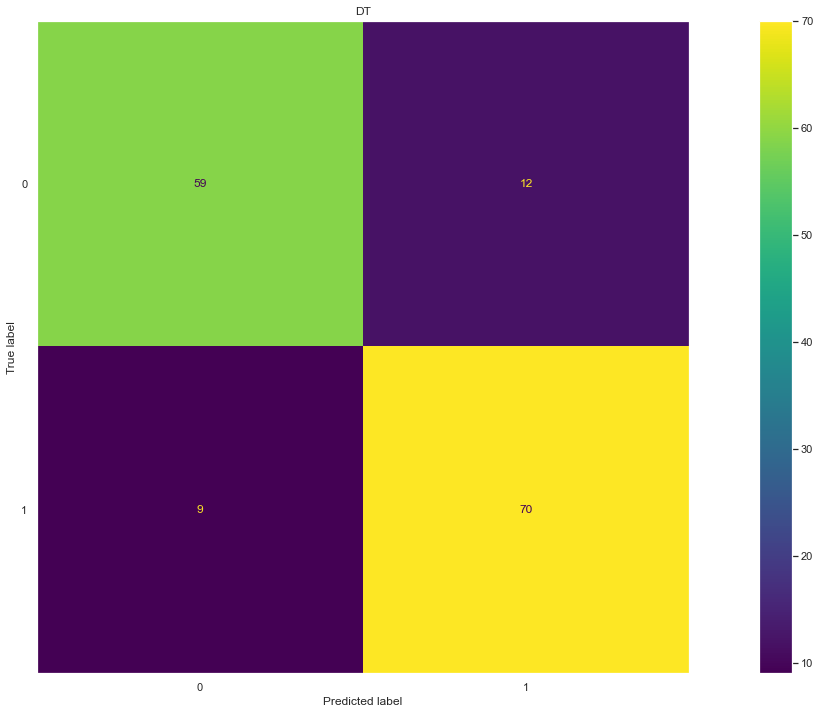

In [77]:
y_pred = dt_pipe.predict(X_test)
finalAccuracy_dt = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(dt_pipe, X_test, y_test)
plt.grid(False)
plt.title('DT')

In [78]:
print(f'''
      Random Forest Average Accuracy {round(averageScore_rf.mean(),3)}
      Naive Bayes Average Accuracy {round(averageScore.mean(),3)}
      K-nearest Neighbour Average Accuracy {round(averageScore_knn.mean(),3)}
      SVC Average Accuracy {round(averageScore_svc.mean(),3)}
      Decision Tree Average Accuracy {round(averageScore_dt.mean(),3)}
      
      ---------------------------------------------------------------------------------------------------------------------------
      
      Random Forest Final Accuracy {round(finalAccuracy_rf.mean(),3)}
      Naive Bayes Final Accuracy {round(finalAccuracy_nb.mean(),3)}
      K-nearest Neighbour Final Accuracy {round(finalAccuracy_knn.mean(),3)}
      SVC Final Accuracy {round(finalAccuracy_svc.mean(),3)}
      Decision Tree Final Accuracy {round(finalAccuracy_dt.mean(),3)}
      
      ''')


      Random Forest Average Accuracy 0.849
      Naive Bayes Average Accuracy 0.765
      K-nearest Neighbour Average Accuracy 0.849
      SVC Average Accuracy 0.846
      Decision Tree Average Accuracy 0.815
      
      ---------------------------------------------------------------------------------------------------------------------------
      
      Random Forest Final Accuracy 0.887
      Naive Bayes Final Accuracy 0.867
      K-nearest Neighbour Final Accuracy 0.887
      SVC Final Accuracy 0.9
      Decision Tree Final Accuracy 0.86
      
      


In [79]:
'''

---------------------------------------------------------------------------------------------------------------------------

From my testing the SVC model and Random Forest model both performed the best

---------------------------------------------------------------------------------------------------------------------------

Let's create a simulation of inputing new data and getting an output.

---------------------------------------------------------------------------------------------------------------------------

We will use the same concept as the random forest regression model.
We are going to use all the models with an accuracy over 85%, which in my testing is all of them.
And we are going to take all their inputs with their hyper parameters and then take the majority vote.

---------------------------------------------------------------------------------------------------------------------------

'''

def getMajorityVote(x_input):
    #Gets a prediction from all the models
    rf_prediction = rf_pipe.predict(x_input)
    nb_prediction = nb_pipe.predict(x_input)
    knn_prediction = knn_pipe.predict(x_input)
    svc_prediction = svc_pipe.predict(x_input)
    dt_prediction = dt_pipe.predict(x_input)

    #Put the outputs into an array
    #predictionArray = [rf_prediction[0], nb_prediction[0], knn_prediction[0], svc_prediction[0], dt_prediction[0]]
    predictionArray = [rf_prediction, nb_prediction, knn_prediction, svc_prediction, dt_prediction]
    return predictionArray


def getMajoritySingleVote(x_input):
    #Gets a prediction from all the models
    rf_prediction = rf_pipe.predict(x_input)
    nb_prediction = nb_pipe.predict(x_input)
    knn_prediction = knn_pipe.predict(x_input)
    svc_prediction = svc_pipe.predict(x_input)
    dt_prediction = dt_pipe.predict(x_input)

    #Put the outputs into an array
    predictionArray = [rf_prediction[0], nb_prediction[0], knn_prediction[0], svc_prediction[0], dt_prediction[0]]
    #Count how many 0's and ones there arethere are
    zeros = predictionArray.count(0)
    ones = predictionArray.count(1)

    #Get the final verdict from the majority vote. There are an off number of predictions, so the winner will always be either 0 or 1
    #There  will not be a tie.
    if zeros > ones:
        return  0
    else:
        return 1
    


In [80]:
def getVote(predictions):
    zeros = predictions.count(0)
    ones = predictions.count(1)
    if zeros > ones:
        return  0
    else:
        return 1

x_input = X_test
predictions = getMajorityVote(x_input)

currentArray = []
newArray = []

for i in range(len(x_input)):
    for j in range(5):
        #print(predictions[j][i])
        currentArray.append(predictions[j][i])  
    vote = getVote(currentArray)
    currentArray = []
    newArray.append(vote)

numpyArray = np.array(newArray)
votePredictions = pd.Series(numpyArray)
print(classification_report(y_test, votePredictions))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        71
           1       0.89      0.90      0.89        79

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



In [81]:
#Converts the inputs into a dataframe
def getDataFrame(Age, Sex,ChestPainType,RestingBP ,Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope):
    
    if Sex == 'M':
        Sex_M = 1
    elif Sex == 'F':
        Sex_M = 0
    else:
        print('Please enter a valid biological gender')
        return 
    
    ST_Slope_Up = 0
    ST_Slope_Flat = 0
    ST_Slope_Down = 0
        
    if ST_Slope == 'Up':
        ST_Slope_Up = 1
    elif ST_Slope == 'Down':
        ST_Slope_Down = 1
    elif ST_Slope == 'Flat':
        ST_Slope_Flat = 1
    else:
        print('Please enter a valid slope')
        return 

    ExerciseAngina_Y = 0
    ExerciseAngina_N = 0
    if ExerciseAngina == 'Y':
        ExerciseAngina_Y = 1
    elif ExerciseAngina == 'N':
        ExerciseAngina_N = 1
    else:
        print('Please enter a valid exercise angina')
        return
    
    RestingECG_ST = 0
    RestingECG_Normal = 0
    RestingECG_LVH = 0
    if RestingECG == 'ST':
        RestingECG_ST = 1
    elif RestingECG == 'Normal':
        RestingECG_Normal = 1
    elif RestingECG == 'LVH':
        RestingECG_LVH = 1
    else:
        print('Please enter a valid resting ecg')
        return
    
    ChestPainType_TA = 0
    ChestPainType_ATA = 0
    ChestPainType_ASY = 0
    ChestPainType_NAP = 0
    if ChestPainType == 'TA':
        ChestPainType_TA = 1
    elif ChestPainType == 'ATA':
        ChestPainType_ATA = 1
    elif ChestPainType == 'ASY':
        ChestPainType_ASY = 1
    elif ChestPainType == 'NAP':
        ChestPainType_NAP = 1
    else:
        print('Please enter a valid chest pain type')
        return
    
    dataFrame = {
        'Age': [Age],
        'RestingBP': [RestingBP],
        'Cholesterol': [Cholesterol],
        'FastingBS': [FastingBS],
        'MaxHR': [MaxHR],
        'Oldpeak': [Oldpeak],
        'ChestPainType_ASY': ChestPainType_ASY,
        'ChestPainType_ATA': ChestPainType_ATA,
        'ChestPainType_NAP': ChestPainType_NAP,
        'ChestPainType_TA': ChestPainType_TA,
        'RestingECG_LVH': RestingECG_LVH,
        'RestingECG_Normal': RestingECG_Normal,
        'RestingECG_ST': RestingECG_ST,
        'ExerciseAngina_N': ExerciseAngina_N,
        'ExerciseAngina_Y': ExerciseAngina_Y,
        'ST_Slope_Down': ST_Slope_Down,
        'ST_Slope_Flat': ST_Slope_Flat,
        'ST_Slope_Up': ST_Slope_Up,
        'Sex_M':Sex_M
    }
    
    df = pd.DataFrame(dataFrame)
    return df

In [82]:
'''

---------------------------------------------------------------------------------------------------------------------------

Scores are looking pretty good

---------------------------------------------------------------------------------------------------------------------------

'''

Age = 70

#  [ M or F ]
Sex = 'M'

# [ TA or ATA or NAP or ASY ]
ChestPainType = 'ASY'

RestingBP = 140.0

Cholesterol = 289.0

FastingBS = 0

# [ Normal or ST or LVH ]
RestingECG = 'Normal'

MaxHR = 120

# [ N or Y ]
ExerciseAngina = 'N'

Oldpeak = 1.0

# [ Up or Flat or Down ]
ST_Slope = 'Flat'


df = getDataFrame(Age,Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope)
finalPrediction = getMajoritySingleVote(df)
print('The final prediction is: ', finalPrediction)

The final prediction is:  1
